In [1]:
import sys
sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')
from meltsdynamic import MELTSdynamic
from meltsengine import MELTSengine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from meltsplotter import MELTSplotter
import sys, os
import shutil
import tempfile
from collections import OrderedDict
from pathlib import Path
import deepdish as dd
import itertools
%matplotlib inline
import time
import random
import pyMELTScalc as M
import re
from matplotlib.cm import get_cmap
from cmcrameri import cm
import Thermobar as pt
import distinctipy
import PySulfSat as ss

In [2]:
file = pd.read_csv('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-master/Examples/CrystallisationTests/SchmidtVan_scss.csv')
header = file.columns.values.tolist()

In [3]:
bulk = file.iloc[0].values.tolist()

h2o = [1.0,2.0]
emptydf = pd.DataFrame()

for i in range(len(h2o)):
    bulk[15] = h2o[i]
    emptydf = emptydf.append(pd.DataFrame([bulk]), ignore_index=True)

emptydf.columns = header
emptydf = emptydf[['SiO2', 'TiO2', 'Al2O3','FeOt', 'MgO', 'CaO', 'Na2O', 'K2O','MnO', 'P2O5', 'H2O']]#, 'CO2'
emptydf

,SiO2,TiO2,Al2O3,FeOt,MgO,CaO,Na2O,K2O,MnO,P2O5,H2O
0,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,1.0
1,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,2.0


In [4]:
emptydf.columns = [str(col) + '_Liq' for col in emptydf.columns]
# Next steps are to calculate the redox state of the initial melt series
emptydf['Sample_ID_Liq'] = emptydf.index
# Fe3Fet_Liq buffer is Temperature dependent so calc T
T_HT87=pt.calculate_liq_only_temp(liq_comps=emptydf, equationT='T_Helz1987_MgO')
# gives 1547.043 K (1274 C)

In [5]:
# For a known buffer e.g. QFM+1, issue is fixed pressure 
myLiquids_Fe3_Kress_norm_QFM1=pt.convert_fo2_to_fe_partition(liq_comps=emptydf, T_K=T_HT87,
                            P_kbar=2, fo2="QFM",fo2_offset=1, model="Kress1991", renorm=True) #check pkbar
myLiquids_Fe3_Kress_norm_QFM1['buffer'] = 'QFM_1' #change back to 1
myLiquids_Fe3_Kress_norm_QFM1[['H2O_Liq']] = emptydf[['H2O_Liq']] #,'CO2_Liq','CO2_Liq'

In [6]:
myLiquids_Fe3_Kress_norm_QFM1

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,buffer,H2O_Liq
0,49.572509,0.695228,12.997735,2.411989,7.863542,0.201515,13.027962,11.294931,2.005077,0.977349,0.201515,0.216299,QFM_1,1.0
1,50.062719,0.702103,13.126266,2.423495,7.952417,0.203508,13.156792,11.406624,2.024905,0.987014,0.203508,0.215202,QFM_1,2.0


In [7]:
myLiquids_Fe3_Kress_norm_QFM=pt.convert_fo2_to_fe_partition(liq_comps=emptydf, T_K=T_HT87,
                            P_kbar=2, fo2="QFM", model="Kress1991", renorm=True)
myLiquids_Fe3_Kress_norm_QFM['buffer'] = 'QFM'
myLiquids_Fe3_Kress_norm_QFM[['H2O_Liq']] = emptydf[['H2O_Liq']] #,'CO2_Liq','CO2_Liq'

In [8]:
myLiquids_Fe3_Kress_norm_QFM

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,buffer,H2O_Liq
0,49.608903,0.695738,13.007277,1.668182,8.540559,0.201663,13.037527,11.303223,2.006549,0.978067,0.201663,0.149481,QFM,1.0
1,50.099322,0.702616,13.135863,1.675411,8.633328,0.203657,13.166412,11.414964,2.026385,0.987735,0.203657,0.148659,QFM,2.0


In [9]:
myLiquids_Fe3_Kress_norm_NNO=pt.convert_fo2_to_fe_partition(liq_comps=emptydf, T_K=T_HT87,
                            P_kbar=2, fo2="NNO", model="Kress1991", renorm=True)
myLiquids_Fe3_Kress_norm_NNO['buffer'] = 'NNO'
myLiquids_Fe3_Kress_norm_NNO[['H2O_Liq']] = emptydf[['H2O_Liq']] #,'CO2_Liq','CO2_Liq'

In [10]:
myLiquids_Fe3_Kress_norm_NNO

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,buffer,H2O_Liq
0,49.586441,0.695423,13.001388,2.127251,8.122712,0.201572,13.031624,11.298105,2.005640,0.977624,0.201572,0.190708,NNO,1.0
1,50.076735,0.702299,13.129941,2.137042,8.213148,0.203565,13.160476,11.409817,2.025472,0.987290,0.203565,0.189710,NNO,2.0


In [11]:
unbuff = emptydf.copy()
unbuff['Fe3Fet_Liq'] = 0.25 
unbuff['buffer'] = 'unbuffered'
unbuff

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,MnO_Liq,P2O5_Liq,H2O_Liq,Sample_ID_Liq,Fe3Fet_Liq,buffer
0,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,1.0,0,0.25,unbuffered
1,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,2.0,1,0.25,unbuffered


In [12]:
# merge dataframes ready for MELTS simulations - for practice just use 2 to save time
merged = pd.concat([myLiquids_Fe3_Kress_norm_QFM,myLiquids_Fe3_Kress_norm_QFM1,unbuff],ignore_index=True) #,,]
merged

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,buffer,H2O_Liq,FeOt_Liq,Sample_ID_Liq
0,49.608903,0.695738,13.007277,1.668182,8.540559,0.201663,13.037527,11.303223,2.006549,0.978067,0.201663,0.149481,QFM,1.0,NaN,NaN
1,50.099322,0.702616,13.135863,1.675411,8.633328,0.203657,13.166412,11.414964,2.026385,0.987735,0.203657,0.148659,QFM,2.0,NaN,NaN
2,49.572509,0.695228,12.997735,2.411989,7.863542,0.201515,13.027962,11.294931,2.005077,0.977349,0.201515,0.216299,QFM_1,1.0,NaN,NaN
3,50.062719,0.702103,13.126266,2.423495,7.952417,0.203508,13.156792,11.406624,2.024905,0.987014,0.203508,0.215202,QFM_1,2.0,NaN,NaN
4,49.200000,0.690000,12.900000,NaN,NaN,0.200000,12.930000,11.210000,1.990000,0.970000,0.200000,0.250000,unbuffered,1.0,9.9596,0.0
5,49.200000,0.690000,12.900000,NaN,NaN,0.200000,12.930000,11.210000,1.990000,0.970000,0.200000,0.250000,unbuffered,2.0,9.9596,1.0


In [13]:
# Making sure that FeOt is filled:
#merged['FeOt_Liq'] = merged['Fe2O3_Liq'] + merged['FeO_Liq']
merged['FeOt_Liq'] = np.where(merged['FeOt_Liq'].isnull(), merged['Fe2O3_Liq'] + merged['FeO_Liq'],merged['FeOt_Liq'])
merged

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe3Fet_Liq,buffer,H2O_Liq,FeOt_Liq,Sample_ID_Liq
0,49.608903,0.695738,13.007277,1.668182,8.540559,0.201663,13.037527,11.303223,2.006549,0.978067,0.201663,0.149481,QFM,1.0,10.208741,NaN
1,50.099322,0.702616,13.135863,1.675411,8.633328,0.203657,13.166412,11.414964,2.026385,0.987735,0.203657,0.148659,QFM,2.0,10.308738,NaN
2,49.572509,0.695228,12.997735,2.411989,7.863542,0.201515,13.027962,11.294931,2.005077,0.977349,0.201515,0.216299,QFM_1,1.0,10.275531,NaN
3,50.062719,0.702103,13.126266,2.423495,7.952417,0.203508,13.156792,11.406624,2.024905,0.987014,0.203508,0.215202,QFM_1,2.0,10.375912,NaN
4,49.200000,0.690000,12.900000,NaN,NaN,0.200000,12.930000,11.210000,1.990000,0.970000,0.200000,0.250000,unbuffered,1.0,9.959600,0.0
5,49.200000,0.690000,12.900000,NaN,NaN,0.200000,12.930000,11.210000,1.990000,0.970000,0.200000,0.250000,unbuffered,2.0,9.959600,1.0


In [14]:
merged['dictindex'] = 'H2O_' + merged['H2O_Liq'].astype(str)  + '_' 'buff_' + merged['buffer'] #+ '_' 'CO2_' + merged['CO2_Liq'].astype(str)

MELTS_iter = merged[['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'Fe2O3_Liq', 'FeO_Liq','FeOt_Liq', 'MgO_Liq', 'CaO_Liq',
       'Na2O_Liq','K2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq','Fe3Fet_Liq', 
       'dictindex']] #'CO2_Liq',

Comp = MELTS_iter.copy()
Comp #note that row number is the number of unique MELTS inputs 

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Fe2O3_Liq,FeO_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,dictindex
0,49.608903,0.695738,13.007277,1.668182,8.540559,10.208741,13.037527,11.303223,2.006549,0.978067,0.978067,0.201663,1.0,0.149481,H2O_1.0_buff_QFM
1,50.099322,0.702616,13.135863,1.675411,8.633328,10.308738,13.166412,11.414964,2.026385,0.987735,0.987735,0.203657,2.0,0.148659,H2O_2.0_buff_QFM
2,49.572509,0.695228,12.997735,2.411989,7.863542,10.275531,13.027962,11.294931,2.005077,0.977349,0.977349,0.201515,1.0,0.216299,H2O_1.0_buff_QFM_1
3,50.062719,0.702103,13.126266,2.423495,7.952417,10.375912,13.156792,11.406624,2.024905,0.987014,0.987014,0.203508,2.0,0.215202,H2O_2.0_buff_QFM_1
4,49.200000,0.690000,12.900000,NaN,NaN,9.959600,12.930000,11.210000,1.990000,0.970000,0.970000,0.200000,1.0,0.250000,H2O_1.0_buff_unbuffered
5,49.200000,0.690000,12.900000,NaN,NaN,9.959600,12.930000,11.210000,1.990000,0.970000,0.970000,0.200000,2.0,0.250000,H2O_2.0_buff_unbuffered


In [15]:
P_lin = ([2000.0,1000.0, 500.0]) #np.array([2000.0, 4000.0]) doesnt work

P_results = {}
for i in range(len(P_lin)):
    P_bar = P_lin[i]
    print(P_bar)
    Results = M.multi_path(cores =4, Model = "MELTSv1.0.2", comp = Comp, Frac_solid = True, Frac_fluid = True, T_end_C = 700, dt_C = 5,
                      P_bar = P_bar, Fe3Fet_Liq = None, H2O_Liq = None, find_liquidus = True)

    P_results['P = ' + str(P_lin[i]) + ' bars'] = Results

2000.0


Running MELTSv1.0.2 calculations 0 to 3.0 ... Complete (time taken = 367.32 seconds)
Running MELTSv1.0.2 calculations 4 to 5.0 ... Complete (time taken = 186.21 seconds)

1000.0


Running MELTSv1.0.2 calculations 0 to 3.0 ... Complete (time taken = 187.64 seconds)
Running MELTSv1.0.2 calculations 4 to 5.0 ... Complete (time taken = 187.02 seconds)

500.0


Running MELTSv1.0.2 calculations 0 to 3.0 ... Complete (time taken = 7.4 seconds)
Running MELTSv1.0.2 calculations 4 to 5.0 ... Complete (time taken = 184.76 seconds)



In [19]:
P_results.keys(), P_results['P = 2000.0 bars'].keys()

(dict_keys(['P = 2000.0 bars', 'P = 1000.0 bars', 'P = 500.0 bars']),
 dict_keys(['index = 1', 'index = 0', 'index = 5']))

In [20]:
empty = pd.DataFrame() 

for key in P_results:
    # p_dict is a dictionary of a single pressure 
    p_dict = P_results[key]
    final_dict = p_dict
    for key in final_dict:
        new = final_dict[key]['All']
        new['dict_index'] = key
        new[['pressure_bar', 'T_C']] = final_dict[key]['Conditions'][['P_bar','T_C']]
        empty = empty.append(new)
empty.dict_index.unique()

array(['index = 1', 'index = 0', 'index = 5', 'index = 3', 'index = 2',
       'index = 4'], dtype=object)

In [21]:
# replace dict_index values with H2O_CO2_fo2 identifiers

MELTS_iter['index'] = MELTS_iter.index #caveats w this format, change 
newkeys = MELTS_iter[['index','dictindex']]
newkeys

<ipython-input-21-03566c99aa98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MELTS_iter['index'] = MELTS_iter.index #caveats w this format, change


,index,dictindex
0,0,H2O_1.0_buff_QFM
1,1,H2O_2.0_buff_QFM
2,2,H2O_1.0_buff_QFM_1
3,3,H2O_2.0_buff_QFM_1
4,4,H2O_1.0_buff_unbuffered
5,5,H2O_2.0_buff_unbuffered


In [22]:
empty_index = empty.reset_index()

In [23]:
empty_index['newentry'] = empty_index['dict_index'].str.extract('(\d+)')
empty_index['newentry'] 

0       1
1       1
2       1
3       1
4       1
       ..
1173    4
1174    4
1175    4
1176    4
1177    4
Name: newentry, Length: 1178, dtype: object

In [24]:
empty_index['newcolumn'] = 0
for i in range(len(empty_index)):
    empty_index['newentry'][i] = float(empty_index['newentry'][i])
    empty_index['newcolumn'][i] = newkeys['dictindex'][empty_index['newentry'][i]]
empty_index.shape

<ipython-input-24-69e151919c31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_index['newentry'][i] = float(empty_index['newentry'][i])
<ipython-input-24-69e151919c31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_index['newcolumn'][i] = newkeys['dictindex'][empty_index['newentry'][i]]
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self

(1178, 230)

In [25]:
empty_index['unique'] = 'P_'+ empty_index['P_bar'].astype(str) + '_' + empty_index['newcolumn'].astype(str)

empty_index.newcolumn.unique(), empty_index.unique.unique() #if run at 2 pressures there should be double the categories of newcolumn


(array(['H2O_2.0_buff_QFM', 'H2O_1.0_buff_QFM', 'H2O_2.0_buff_unbuffered',
        'H2O_2.0_buff_QFM_1', 'H2O_1.0_buff_QFM_1',
        'H2O_1.0_buff_unbuffered'], dtype=object),
 array(['P_2000.0_H2O_2.0_buff_QFM', 'P_2000.0_H2O_1.0_buff_QFM',
        'P_2000.0_H2O_2.0_buff_unbuffered', 'P_1000.0_H2O_2.0_buff_QFM_1',
        'P_1000.0_H2O_2.0_buff_QFM', 'P_1000.0_H2O_1.0_buff_QFM',
        'P_1000.0_H2O_2.0_buff_unbuffered', 'P_500.0_H2O_1.0_buff_QFM',
        'P_500.0_H2O_2.0_buff_QFM_1', 'P_500.0_H2O_1.0_buff_QFM_1',
        'P_500.0_H2O_2.0_buff_QFM', 'P_500.0_H2O_1.0_buff_unbuffered'],
       dtype=object))

### Part 5: Export master dataframe. Read in for following steps to reduce computer power. Unless we want to amend the data up to this point

In [26]:
# version 1.0.2 simulations
## empty_index.to_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_50to200.xlsx')

empty_index.to_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_JAN.xlsx')


In [4]:
#empty_na = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_deep.xlsx', index_col=0)
#empty_na_shall = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_shall.xlsx', index_col=0)

#empty_na = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_50to200.xlsx', index_col=0)
empty_na = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_JAN.xlsx', index_col=0)


empty_na = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_400.xlsx', index_col=0)
empty_na2 = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_200.xlsx', index_col=0)
empty_na1 = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_100.xlsx', index_col=0)
empty_na_shall = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.0.2_50.xlsx', index_col=0)


In [5]:
empty_na.shape#, empty_na_shall.shape

(1178, 231)

In [6]:
empty_index = pd.concat([empty_na], axis=0,ignore_index=True) #,empty_na_shall
empty_index

,index,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,...,H2O_leucite1,CO2_leucite1,Fe3Fet_leucite1,h_leucite1,mass_leucite1,v_leucite1,rho_leucite1,newentry,newcolumn,unique
0,0,1302.900000,2000,-1.195780e+06,293.502161,39.205740,48.072908,0.674197,12.604545,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
1,1,1297.917355,2000,-1.196847e+06,292.824540,39.168922,48.116057,0.678167,12.678775,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
2,2,1292.934711,2000,-1.190470e+06,290.677471,38.949308,48.159163,0.682120,12.752673,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
3,3,1287.952066,2000,-1.184187e+06,288.558813,38.732731,48.202061,0.686039,12.825954,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
4,4,1282.969421,2000,-1.178042e+06,286.477006,38.520255,48.244748,0.689926,12.898618,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,83,880.000000,500,-2.066264e+05,39.988245,6.963420,67.967857,0.384784,11.444378,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,H2O_1.0_buff_unbuffered,P_500.0_H2O_1.0_buff_unbuffered
1174,84,875.000000,500,-2.026627e+05,39.065141,6.824785,68.263532,0.380263,11.291243,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,H2O_1.0_buff_unbuffered,P_500.0_H2O_1.0_buff_unbuffered
1175,85,870.000000,500,-1.988657e+05,38.180916,6.691983,68.550548,0.376038,11.140250,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,H2O_1.0_buff_unbuffered,P_500.0_H2O_1.0_buff_unbuffered
1176,86,865.000000,500,-1.952476e+05,37.301613,6.594254,68.914837,0.363178,10.908055,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,H2O_1.0_buff_unbuffered,P_500.0_H2O_1.0_buff_unbuffered


## Part 6: Calculate the SCSS for each step of each simulation
To explore which model is best suited for the purpose of your calc see: https://github.com/PennyWieser/PySulfSat/blob/main/src/PySulfSat/Available_Models.pdf

In [7]:
# Routine check that we fractionated phases/ which phases we fractionated
empty_index.columns

Index(['index', 'T_C', 'P_bar', 'h', 's', 'v', 'SiO2_Liq', 'TiO2_Liq',
       'Al2O3_Liq', 'Cr2O3_Liq',
       ...
       'H2O_leucite1', 'CO2_leucite1', 'Fe3Fet_leucite1', 'h_leucite1',
       'mass_leucite1', 'v_leucite1', 'rho_leucite1', 'newentry', 'newcolumn',
       'unique'],
      dtype='object', length=231)

In [8]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=empty_index, T_K=empty_index['T_C']+273.15,
                                             P_kbar=empty_index['pressure_bar']/1000, Fe_FeNiCu_Sulf=0.65,
                                             Fe3Fet_Liq=empty_index['Fe3Fet_Liq'])


Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


In [9]:
Smythe_CalcSulf.head()

,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,H2O_leucite1,CO2_leucite1,Fe3Fet_leucite1,h_leucite1,mass_leucite1,v_leucite1,rho_leucite1,newentry,newcolumn,unique
0,1232.575445,336.702357,1576.050000,2.0,0.65,0.148441,0.399843,0.004217,0.123558,0.156652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
1,1216.483765,332.306597,1571.067355,2.0,0.65,0.149342,0.400241,0.004242,0.124298,0.154036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
2,1200.519926,327.945758,1566.084711,2.0,0.65,0.150251,0.400638,0.004267,0.125034,0.151440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
3,1184.695639,323.623041,1561.102066,2.0,0.65,0.151165,0.401030,0.004292,0.125764,0.148872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM
4,1169.009315,319.338012,1556.119421,2.0,0.65,0.152084,0.401420,0.004317,0.126487,0.146333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,H2O_2.0_buff_QFM,P_2000.0_H2O_2.0_buff_QFM


Text(0, 0.5, 'SCSS (Smythe, ppm)')

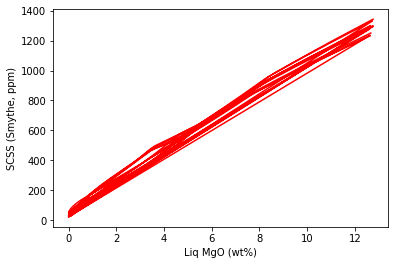

In [10]:
plt.plot(empty_index['MgO_Liq'], Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],'-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('SCSS (Smythe, ppm)')

Text(0, 0.5, 'Liq FeO (wt%)')

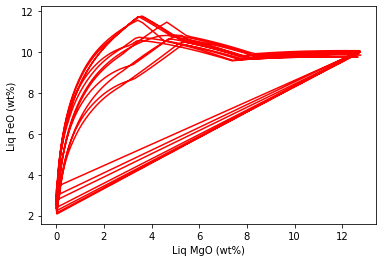

In [11]:
plt.plot(empty_index['MgO_Liq'],empty_index['FeOt_Liq'],'-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('Liq FeO (wt%)')

## O'Neill 2021

In [12]:
#Fe_FeNiCu_Sulf=0.66
Fe_FeNiCu_Sulf=empty_index['Fe3Fet_Liq']
if isinstance(Fe_FeNiCu_Sulf, float) is True:
    print('float')

In [13]:
ONeill_MeasSulf=ss.calculate_O2021_SCSS(df=empty_index, T_K=empty_index['T_C']+273.15, 
P_kbar=empty_index['pressure_bar']/1000,Fe_FeNiCu_Sulf=0.66,Fe3Fet_Liq=empty_index['Fe3Fet_Liq'])
ONeill_MeasSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,index,T_C,P_bar,h,...,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,Fe2_Liq_cat_frac
0,1477.061876,7.297810,-2.343946,-0.483504,7.005967,-1.568599,0,1302.900000,2000,-1.195780e+06,...,0.077187,0.109411,0.138494,0.035147,0.011272,0.004728,0.0,0.694633,0.727615,0.065729
1,1459.689606,7.285979,-2.341110,-0.483475,7.036126,-1.607782,1,1297.917355,2000,-1.196847e+06,...,0.077237,0.110123,0.139424,0.035383,0.011348,0.004760,0.0,0.691067,0.724493,0.065702
2,1442.387671,7.274055,-2.338345,-0.483439,7.066487,-1.647338,2,1292.934711,2000,-1.190470e+06,...,0.077280,0.110832,0.140351,0.035618,0.011424,0.004791,0.0,0.687461,0.721334,0.065668
3,1425.181287,7.262054,-2.335657,-0.483397,7.097052,-1.687259,3,1287.952066,2000,-1.184187e+06,...,0.077316,0.111535,0.141271,0.035852,0.011498,0.004823,0.0,0.683828,0.718152,0.065628
4,1408.071471,7.249976,-2.333046,-0.483347,7.127824,-1.727546,4,1282.969421,2000,-1.178042e+06,...,0.077345,0.112233,0.142185,0.036083,0.011573,0.004854,0.0,0.680169,0.714944,0.065582


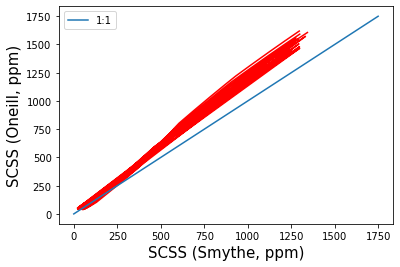

In [14]:
plt.plot(Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'], ONeill_MeasSulf['SCSS2_ppm'],
         '-r')
plt.xlabel('SCSS (Smythe, ppm)', size=15)
plt.ylabel('SCSS (Oneill, ppm)', size=15)

plt.plot([0,1750], [0,1750], label='1:1')
plt.legend()

## Li and Zhang 2022

In [15]:
LiZhang22=ss.calculate_LZ2022_SCSS(df=empty_index, T_K=empty_index['T_C']+273.15, 
P_kbar=empty_index['pressure_bar']/1000,Fe_FeNiCu_Sulf=0.66,Fe3Fet_Liq=empty_index['Fe3Fet_Liq'])
LiZhang22.head()

replacing Fe3Fet_Liq in the original dataframe with that input into the function


,SCSS_Tot,index,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,1460.817038,0,1302.900000,2000,-1.195780e+06,293.502161,39.205740,48.072908,0.674197,12.604545,...,0.138281,0.065628,0.0,0.175316,0.109243,0.035093,0.011255,0.001540,0.0,0.011440
1,1444.623313,1,1297.917355,2000,-1.196847e+06,292.824540,39.168922,48.116057,0.678167,12.678775,...,0.139208,0.065600,0.0,0.172512,0.109952,0.035328,0.011330,0.001550,0.0,0.011517
2,1428.499849,2,1292.934711,2000,-1.190470e+06,290.677471,38.949308,48.159163,0.682120,12.752673,...,0.140132,0.065566,0.0,0.169725,0.110659,0.035562,0.011406,0.001561,0.0,0.011593
3,1412.475098,3,1287.952066,2000,-1.184187e+06,288.558813,38.732731,48.202061,0.686039,12.825954,...,0.141049,0.065525,0.0,0.166965,0.111360,0.035795,0.011480,0.001571,0.0,0.011669
4,1396.549827,4,1282.969421,2000,-1.178042e+06,286.477006,38.520255,48.244748,0.689926,12.898618,...,0.141960,0.065479,0.0,0.164232,0.112056,0.036026,0.011554,0.001581,0.0,0.011744


### Part 7: Calculating Phase Proportions

In [16]:
keepcols = empty_index.columns[empty_index.columns.str.contains('_Liq|pressure_bar|T_C|newcolumn')]

In [17]:
slicedat = empty_index[keepcols]

In [18]:
mass_cols = empty_index.columns[empty_index.columns.str.contains('index|mass|unique')]
syst_mass = empty_index[mass_cols]
column_to_move = syst_mass.pop("dict_index")
syst_mass.insert(12, "dict_index", column_to_move)
syst_mass
syst_mass

,index,mass_Liq,mass_Ol,mass_Cpx,mass_Sp,mass_Plag,mass_water1,mass_Apa,mass_Rhm,mass_Kspar,mass_rutile1,mass_leucite1,dict_index,unique
0,0,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,index = 1,P_2000.0_H2O_2.0_buff_QFM
1,1,99.414531,0.585469,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,index = 1,P_2000.0_H2O_2.0_buff_QFM
2,2,98.838455,0.577551,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,index = 1,P_2000.0_H2O_2.0_buff_QFM
3,3,98.273741,0.566189,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,index = 1,P_2000.0_H2O_2.0_buff_QFM
4,4,97.720118,0.555099,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,index = 1,P_2000.0_H2O_2.0_buff_QFM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,83,15.426581,0.046183,0.0,0.010576,0.259189,0.008435,0.010906,NaN,0.000000,0.000000,NaN,index = 4,P_500.0_H2O_1.0_buff_unbuffered
1174,84,15.117331,0.043225,0.0,0.009952,0.249406,0.008089,0.010615,NaN,0.000000,0.000000,NaN,index = 4,P_500.0_H2O_1.0_buff_unbuffered
1175,85,14.820375,0.040481,0.0,0.009394,0.240977,0.007780,0.010366,NaN,0.000000,0.000000,NaN,index = 4,P_500.0_H2O_1.0_buff_unbuffered
1176,86,14.334481,0.044589,0.0,0.004867,0.193033,0.011547,0.014704,NaN,0.226163,0.003041,NaN,index = 4,P_500.0_H2O_1.0_buff_unbuffered


In [19]:
syst_mass.iloc[:,2:12]#was 2:11

,mass_Ol,mass_Cpx,mass_Sp,mass_Plag,mass_water1,mass_Apa,mass_Rhm,mass_Kspar,mass_rutile1,mass_leucite1
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN
1,0.585469,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN
2,0.577551,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN
3,0.566189,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN
4,0.555099,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
1173,0.046183,0.0,0.010576,0.259189,0.008435,0.010906,NaN,0.000000,0.000000,NaN
1174,0.043225,0.0,0.009952,0.249406,0.008089,0.010615,NaN,0.000000,0.000000,NaN
1175,0.040481,0.0,0.009394,0.240977,0.007780,0.010366,NaN,0.000000,0.000000,NaN
1176,0.044589,0.0,0.004867,0.193033,0.011547,0.014704,NaN,0.226163,0.003041,NaN


In [20]:
# the mass crystallising at each step. 
cumulate_phase_mass = syst_mass.iloc[:,2:12].sum(axis=1) #was 11 and then 17
cumulate_phase_mass

0       0.000000
1       0.585469
2       0.577551
3       0.566189
4       0.555099
          ...   
1173    0.335290
1174    0.321287
1175    0.308998
1176    0.497942
1177    0.777650
Length: 1178, dtype: float64

In [21]:
# Replace all naN entries with 0 - perhaps do this in an earlier step
syst_mass = syst_mass.fillna(0)

In [22]:
syst_mass.columns[2:12] # we want column range starting with first phase to the end e.g. mass_Ol was 17

Index(['mass_Ol', 'mass_Cpx', 'mass_Sp', 'mass_Plag', 'mass_water1',
       'mass_Apa', 'mass_Rhm', 'mass_Kspar', 'mass_rutile1', 'mass_leucite1'],
      dtype='object')

In [23]:
# Calculate cumulative masses of solid phases, exlcuding index column 
for i in syst_mass.columns[2:12]:
    syst_mass[i + '_cumulative'] = syst_mass.groupby('unique')[i].transform(pd.Series.cumsum)

syst_mass[syst_mass.columns[13:]]

,unique,mass_Ol_cumulative,mass_Cpx_cumulative,mass_Sp_cumulative,mass_Plag_cumulative,mass_water1_cumulative,mass_Apa_cumulative,mass_Rhm_cumulative,mass_Kspar_cumulative,mass_rutile1_cumulative,mass_leucite1_cumulative
0,P_2000.0_H2O_2.0_buff_QFM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,P_2000.0_H2O_2.0_buff_QFM,0.585469,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,P_2000.0_H2O_2.0_buff_QFM,1.163020,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,P_2000.0_H2O_2.0_buff_QFM,1.729209,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,P_2000.0_H2O_2.0_buff_QFM,2.284308,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1173,P_500.0_H2O_1.0_buff_unbuffered,19.767907,30.425804,4.295106,29.708173,0.612213,0.296820,0.0,0.000000,0.000000,0.0
1174,P_500.0_H2O_1.0_buff_unbuffered,19.811132,30.425804,4.305058,29.957578,0.620302,0.307435,0.0,0.000000,0.000000,0.0
1175,P_500.0_H2O_1.0_buff_unbuffered,19.851612,30.425804,4.314452,30.198556,0.628082,0.317801,0.0,0.000000,0.000000,0.0
1176,P_500.0_H2O_1.0_buff_unbuffered,19.896201,30.425804,4.319319,30.391588,0.639629,0.332505,0.0,0.226163,0.003041,0.0


In [24]:
syst_mass[syst_mass.columns[14:24]] #select just the columns with mass_'phase'_cumulative, no Liq or unique was 19:34

,mass_Ol_cumulative,mass_Cpx_cumulative,mass_Sp_cumulative,mass_Plag_cumulative,mass_water1_cumulative,mass_Apa_cumulative,mass_Rhm_cumulative,mass_Kspar_cumulative,mass_rutile1_cumulative,mass_leucite1_cumulative
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.585469,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,1.163020,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,1.729209,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,2.284308,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
1173,19.767907,30.425804,4.295106,29.708173,0.612213,0.296820,0.0,0.000000,0.000000,0.0
1174,19.811132,30.425804,4.305058,29.957578,0.620302,0.307435,0.0,0.000000,0.000000,0.0
1175,19.851612,30.425804,4.314452,30.198556,0.628082,0.317801,0.0,0.000000,0.000000,0.0
1176,19.896201,30.425804,4.319319,30.391588,0.639629,0.332505,0.0,0.226163,0.003041,0.0


In [25]:
syst_mass['mass_allphase_cumulative'] = syst_mass[syst_mass.columns[14:24]].sum(axis=1)#13:22

syst_mass['mass_syst_unormtot'] = syst_mass['mass_allphase_cumulative'] + syst_mass['mass_Liq']

In [26]:
syst_mass[['mass_allphase_cumulative','mass_syst_unormtot']]

,mass_allphase_cumulative,mass_syst_unormtot
0,0.000000,100.000000
1,0.585469,100.000000
2,1.163020,100.001475
3,1.729209,100.002950
4,2.284308,100.004427
...,...,...
1173,85.106022,100.532603
1174,85.427309,100.544640
1175,85.736307,100.556682
1176,86.234249,100.568730


In [27]:
syst_mass.columns[14:]

Index(['mass_Ol_cumulative', 'mass_Cpx_cumulative', 'mass_Sp_cumulative',
       'mass_Plag_cumulative', 'mass_water1_cumulative', 'mass_Apa_cumulative',
       'mass_Rhm_cumulative', 'mass_Kspar_cumulative',
       'mass_rutile1_cumulative', 'mass_leucite1_cumulative',
       'mass_allphase_cumulative', 'mass_syst_unormtot'],
      dtype='object')

In [28]:
# move column containing strings to the first column
# col = syst_mass.pop('unique_cumulative')
# syst_mass.insert(0, 'unique_cumulative', col)

# move column mass_Liq next to the cumualtive columns - position may change based on number of phases 
col = syst_mass.pop('mass_Liq')
syst_mass.insert(13, 'mass_Liq', col)
# drop mass_Liq_cumulative column since it is meaningless if havent done already
#syst_mass = syst_mass.drop(['mass_Liq_cumulative'], axis=1)

##drop index and unique cumulative
# syst_mass = syst_mass.drop(['unique_cumulative', 'dict_index_cumulative'], axis=1)
syst_mass.columns[14:]

Index(['mass_Ol_cumulative', 'mass_Cpx_cumulative', 'mass_Sp_cumulative',
       'mass_Plag_cumulative', 'mass_water1_cumulative', 'mass_Apa_cumulative',
       'mass_Rhm_cumulative', 'mass_Kspar_cumulative',
       'mass_rutile1_cumulative', 'mass_leucite1_cumulative',
       'mass_allphase_cumulative', 'mass_syst_unormtot'],
      dtype='object')

In [29]:
syst_mass[syst_mass.columns[13:24]].tail()

,mass_Liq,mass_Ol_cumulative,mass_Cpx_cumulative,mass_Sp_cumulative,mass_Plag_cumulative,mass_water1_cumulative,mass_Apa_cumulative,mass_Rhm_cumulative,mass_Kspar_cumulative,mass_rutile1_cumulative,mass_leucite1_cumulative
1173,15.426581,19.767907,30.425804,4.295106,29.708173,0.612213,0.296820,0.0,0.000000,0.000000,0.0
1174,15.117331,19.811132,30.425804,4.305058,29.957578,0.620302,0.307435,0.0,0.000000,0.000000,0.0
1175,14.820375,19.851612,30.425804,4.314452,30.198556,0.628082,0.317801,0.0,0.000000,0.000000,0.0
1176,14.334481,19.896201,30.425804,4.319319,30.391588,0.639629,0.332505,0.0,0.226163,0.003041,0.0
1177,13.572406,19.944140,30.425804,4.321919,30.493261,0.656591,0.353497,0.0,0.807746,0.008941,0.0


In [30]:
#from liq_mass to final mass_phase_cumulative
for i in syst_mass.columns[13:24]:#12:22
    syst_mass[i + '_NORM'] = (syst_mass[i] * 100) / (syst_mass['mass_syst_unormtot'])
syst_mass.columns[25:]

Index(['mass_syst_unormtot', 'mass_Liq_NORM', 'mass_Ol_cumulative_NORM',
       'mass_Cpx_cumulative_NORM', 'mass_Sp_cumulative_NORM',
       'mass_Plag_cumulative_NORM', 'mass_water1_cumulative_NORM',
       'mass_Apa_cumulative_NORM', 'mass_Rhm_cumulative_NORM',
       'mass_Kspar_cumulative_NORM', 'mass_rutile1_cumulative_NORM',
       'mass_leucite1_cumulative_NORM'],
      dtype='object')

In [31]:
syst_mass[syst_mass.columns[26:]].tail()

,mass_Liq_NORM,mass_Ol_cumulative_NORM,mass_Cpx_cumulative_NORM,mass_Sp_cumulative_NORM,mass_Plag_cumulative_NORM,mass_water1_cumulative_NORM,mass_Apa_cumulative_NORM,mass_Rhm_cumulative_NORM,mass_Kspar_cumulative_NORM,mass_rutile1_cumulative_NORM,mass_leucite1_cumulative_NORM
1173,15.344854,19.663180,30.264614,4.272351,29.550784,0.608969,0.295248,0.0,0.000000,0.000000,0.0
1174,15.035442,19.703817,30.260991,4.281738,29.795301,0.616941,0.305770,0.0,0.000000,0.000000,0.0
1175,14.738330,19.741713,30.257367,4.290567,30.031376,0.624605,0.316042,0.0,0.000000,0.000000,0.0
1176,14.253417,19.783685,30.253742,4.294892,30.219720,0.636011,0.330625,0.0,0.224884,0.003023,0.0
1177,13.493562,19.828282,30.249057,4.296812,30.316123,0.652777,0.351444,0.0,0.803053,0.008889,0.0


In [32]:
syst_mass[syst_mass.columns[26:]].sum(axis=1) #check all liq and phases norm sum to 100

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
1173    100.0
1174    100.0
1175    100.0
1176    100.0
1177    100.0
Length: 1178, dtype: float64

In [33]:
# seperate calc for mass_allphase_NORMcumulative i.e. excluding the liq_cumunorm mass
# careful rerunning cell as will give false result
syst_mass['mass_allphase_NORMcumu'] = syst_mass[syst_mass.columns[27:]].sum(axis=1)
syst_mass['mass_allphase_NORMcumu']

0        0.000000
1        0.585469
2        1.163003
3        1.729158
4        2.284207
          ...    
1173    84.655146
1174    84.964558
1175    85.261670
1176    85.746583
1177    86.506438
Name: mass_allphase_NORMcumu, Length: 1178, dtype: float64

In [34]:
syst_mass[syst_mass.columns[27:]] #range of cumulative_norm mass phases

,mass_Ol_cumulative_NORM,mass_Cpx_cumulative_NORM,mass_Sp_cumulative_NORM,mass_Plag_cumulative_NORM,mass_water1_cumulative_NORM,mass_Apa_cumulative_NORM,mass_Rhm_cumulative_NORM,mass_Kspar_cumulative_NORM,mass_rutile1_cumulative_NORM,mass_leucite1_cumulative_NORM,mass_allphase_NORMcumu
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.585469,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.585469
2,1.163003,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.163003
3,1.729158,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.729158
4,2.284207,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.284207
...,...,...,...,...,...,...,...,...,...,...,...
1173,19.663180,30.264614,4.272351,29.550784,0.608969,0.295248,0.0,0.000000,0.000000,0.0,84.655146
1174,19.703817,30.260991,4.281738,29.795301,0.616941,0.305770,0.0,0.000000,0.000000,0.0,84.964558
1175,19.741713,30.257367,4.290567,30.031376,0.624605,0.316042,0.0,0.000000,0.000000,0.0,85.261670
1176,19.783685,30.253742,4.294892,30.219720,0.636011,0.330625,0.0,0.224884,0.003023,0.0,85.746583


In [35]:
# where ppn 1 refers to proportion of phases (solid + fluid1) excluding sulfide NO LIQ start with mass_ol_cumu_NORM
# need columns from first and last phase_cumulative_norm masses - test search using cell above
for i in syst_mass.columns[27:]:
    syst_mass[i + '_ppn1'] = (syst_mass[i]) / (syst_mass['mass_allphase_NORMcumu'])
    
syst_mass[syst_mass.columns[37:]].tail()

,mass_allphase_NORMcumu,mass_Ol_cumulative_NORM_ppn1,mass_Cpx_cumulative_NORM_ppn1,mass_Sp_cumulative_NORM_ppn1,mass_Plag_cumulative_NORM_ppn1,mass_water1_cumulative_NORM_ppn1,mass_Apa_cumulative_NORM_ppn1,mass_Rhm_cumulative_NORM_ppn1,mass_Kspar_cumulative_NORM_ppn1,mass_rutile1_cumulative_NORM_ppn1,mass_leucite1_cumulative_NORM_ppn1,mass_allphase_NORMcumu_ppn1
1173,84.655146,0.232274,0.357505,0.050468,0.349073,0.007194,0.003488,0.0,0.000000,0.000000,0.0,1.0
1174,84.964558,0.231906,0.356160,0.050394,0.350679,0.007261,0.003599,0.0,0.000000,0.000000,0.0,1.0
1175,85.261670,0.231543,0.354877,0.050322,0.352226,0.007326,0.003707,0.0,0.000000,0.000000,0.0,1.0
1176,85.746583,0.230723,0.352827,0.050088,0.352431,0.007417,0.003856,0.0,0.002623,0.000035,0.0,1.0
1177,86.506438,0.229212,0.349674,0.049670,0.350449,0.007546,0.004063,0.0,0.009283,0.000103,0.0,1.0


In [36]:
syst_mass[syst_mass.columns[38:]].tail()
# mass_allphase_Normcumu_ppn1 1 should all be = 1 if calc correct

,mass_Ol_cumulative_NORM_ppn1,mass_Cpx_cumulative_NORM_ppn1,mass_Sp_cumulative_NORM_ppn1,mass_Plag_cumulative_NORM_ppn1,mass_water1_cumulative_NORM_ppn1,mass_Apa_cumulative_NORM_ppn1,mass_Rhm_cumulative_NORM_ppn1,mass_Kspar_cumulative_NORM_ppn1,mass_rutile1_cumulative_NORM_ppn1,mass_leucite1_cumulative_NORM_ppn1,mass_allphase_NORMcumu_ppn1
1173,0.232274,0.357505,0.050468,0.349073,0.007194,0.003488,0.0,0.000000,0.000000,0.0,1.0
1174,0.231906,0.356160,0.050394,0.350679,0.007261,0.003599,0.0,0.000000,0.000000,0.0,1.0
1175,0.231543,0.354877,0.050322,0.352226,0.007326,0.003707,0.0,0.000000,0.000000,0.0,1.0
1176,0.230723,0.352827,0.050088,0.352431,0.007417,0.003856,0.0,0.002623,0.000035,0.0,1.0
1177,0.229212,0.349674,0.049670,0.350449,0.007546,0.004063,0.0,0.009283,0.000103,0.0,1.0


## Modelling Sulfur

In [37]:
#append SCSS to working dataframe syst_mass
syst_mass['SCSS_LiZhang22']= LiZhang22['SCSS_Tot']
syst_mass['SCSS_Smythe17']= Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017']
syst_mass['SCSS_Oneill21']= ONeill_MeasSulf['SCSS2_ppm']

In [38]:
# calc melt fraction 
syst_mass['melt_f'] = (syst_mass.mass_Liq_NORM) / 100

# replace nan with 0
syst_mass = syst_mass.replace(np.nan, 0)

# water1 not fluid1 for v.1.0.2

In [39]:
DS = np.empty(len(syst_mass), dtype=float)

S_initial = 1000 #(ppm) assumed input, this can be changed or iterated in a loop 

In [40]:
# not yet got an fo2 sensitive DS fluid-melt

DS_4000 = {1:3, 0.9:3, 0.8:3, 0.7:5, 0.6:8, 0.5:30, 0.4:50, 0.3:100, 0.2:200, 0.1:300, 0.0:300}

DS_2000 = {1:2, 0.9:2, 0.8:2, 0.7:5, 0.6:8, 0.5:30, 0.4:50, 0.3:100, 0.2:200, 0.1:300, 0.0:300}

DS_1600 = {1:1.1, 0.9:1.1, 0.8:1.1, 0.7:5, 0.6:8, 0.5:30, 0.4:50, 0.3:100, 0.2:200, 0.1:300, 0.0:300}

DS_800 = {1:8, 0.9:8, 0.8:8, 0.7:8, 0.6:8, 0.5:30, 0.4:50, 0.3:100, 0.2:200, 0.1:300, 0.0:300}

DS_dict = {'2000':DS_2000,'1000':DS_1600, '500':DS_800}

In [41]:
###### define truncate function
import math
def truncate(number, decimals=1):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [42]:
# create extra column for melt fraction truncated to 1 dp
syst_mass['meltf_1dp1'] = 0 
meltf_1dp = []

for i in range(len(syst_mass)):
    x = syst_mass['melt_f'][i]
    syst_mass['meltf_1dp1'] = truncate(x, decimals=1)
    meltf_1dp.append(syst_mass['meltf_1dp1'].loc[i])
syst_mass['meltf_1dp1'] = meltf_1dp

In [43]:
empty = []
for key, val in DS_dict.items():
    print(key,val)
    dfnew = syst_mass[syst_mass.unique.str.contains(key)]
    
    dfnew['Dsulfur'] = dfnew['meltf_1dp1'].map(val)
    
    print(dfnew[['unique','melt_f','meltf_1dp1', 'Dsulfur']])
    
    empty.append(dfnew['Dsulfur'])
    
    flat_list = [item for sublist in empty for item in sublist]
    
    syst_mass['DS_fm'] = pd.Series(flat_list)

2000 {1: 2, 0.9: 2, 0.8: 2, 0.7: 5, 0.6: 8, 0.5: 30, 0.4: 50, 0.3: 100, 0.2: 200, 0.1: 300, 0.0: 300}
                               unique    melt_f  meltf_1dp1  Dsulfur
0           P_2000.0_H2O_2.0_buff_QFM  1.000000         1.0        2
1           P_2000.0_H2O_2.0_buff_QFM  0.994145         0.9        2
2           P_2000.0_H2O_2.0_buff_QFM  0.988370         0.9        2
3           P_2000.0_H2O_2.0_buff_QFM  0.982708         0.9        2
4           P_2000.0_H2O_2.0_buff_QFM  0.977158         0.9        2
..                                ...       ...         ...      ...
312  P_2000.0_H2O_2.0_buff_unbuffered  0.179887         0.1      300
313  P_2000.0_H2O_2.0_buff_unbuffered  0.171587         0.1      300
314  P_2000.0_H2O_2.0_buff_unbuffered  0.153847         0.1      300
315  P_2000.0_H2O_2.0_buff_unbuffered  0.136257         0.1      300
316  P_2000.0_H2O_2.0_buff_unbuffered  0.123133         0.1      300

[317 rows x 4 columns]
1000 {1: 1.1, 0.9: 1.1, 0.8: 1.1, 0.7: 5, 0.6:

<ipython-input-43-968d0480f146>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Dsulfur'] = dfnew['meltf_1dp1'].map(val)
<ipython-input-43-968d0480f146>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Dsulfur'] = dfnew['meltf_1dp1'].map(val)
<ipython-input-43-968d0480f146>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [44]:

syst_mass['DS_fm'].to_excel('flatlist.xlsx') #check htat the DS matches up, issues with dict orders

In [45]:
# Calc Bulk fluid-melt partition coeffcient of S
syst_mass['bulk_DS'] = syst_mass['DS_fm'] * syst_mass['mass_water1_cumulative_NORM_ppn1']

syst_mass['bulk_S_syst'] = S_initial / syst_mass['melt_f']

# Calc Melt S ppm concentration (sulfide absent FC)
syst_mass['melt_S_nosulf'] = S_initial/ ((syst_mass['bulk_DS']*(1-syst_mass['melt_f'])+ syst_mass['melt_f']))

# Make new column filled with 1000 so we know if calcs have worked or not - ammend this later as not tidy
syst_mass['melt_S_sulf'] = 1000.0000
syst_mass['melt_S_sulf'] 

0       1000.0
1       1000.0
2       1000.0
3       1000.0
4       1000.0
         ...  
1173    1000.0
1174    1000.0
1175    1000.0
1176    1000.0
1177    1000.0
Name: melt_S_sulf, Length: 1178, dtype: float64

In [46]:
# Calc Melt S ppm conc (sulfide present FC)
to_fill = []
u_list = syst_mass.unique.unique()
for u in u_list:
    df = syst_mass[syst_mass.unique == u]
    df = df.reset_index(drop=True)
    
    for i in range(0, len(df)):
        if i == 0:
            df['melt_S_sulf'] =1000.0000
            to_fill.append(df['melt_S_sulf'].loc[i])
    
    for i in range(1, len(df)):
        if df['melt_S_sulf'].loc[i-1] < df['SCSS_Oneill21'].loc[i]:
            df['melt_S_sulf'].loc[i] =  S_initial / ((df['bulk_DS'].loc[i]*(1-df['melt_f'].loc[i])+ df['melt_f'].loc[i]))
            to_fill.append(df['melt_S_sulf'].loc[i])
            
        if df.melt_S_sulf.loc[i-1] >= df['SCSS_Oneill21'].loc[i]:
            df.melt_S_sulf.loc[i] = df['SCSS_Oneill21'].loc[i] 
            to_fill.append(df['melt_S_sulf'].loc[i])
        
        #print(i,df['melt_S_sulf'].loc[i]) #prints each loop from index 1 to the end 
print(len(to_fill))

syst_mass['melt_S_sulf'] = to_fill

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1178


In [47]:
syst_mass['fluid_S'] = syst_mass['bulk_S_syst'] - syst_mass['melt_S_nosulf']
syst_mass.fluid_S

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
           ...     
1173    6011.883066
1174    6151.246231
1175    6290.273260
1176    6528.191810
1177    6933.219177
Name: fluid_S, Length: 1178, dtype: float64

In [48]:
syst_mass['solid_S'] = 0
syst_mass['solid_S']

0       0
1       0
2       0
3       0
4       0
       ..
1173    0
1174    0
1175    0
1176    0
1177    0
Name: solid_S, Length: 1178, dtype: int64

In [49]:
u_list = syst_mass.unique.unique()
for u in u_list:
    df = syst_mass[syst_mass.unique == u]
    df = df.reset_index(drop=True)
    
    for i in range(len(df)):
        if df['index'][i] == 0:
            df['solid_S'].loc[i] = 0
        
        elif df['melt_S_sulf'].loc[i] < df['SCSS_Oneill21'].loc[i]:
            df.solid_S.loc[i] = df.solid_S.loc[i-1]
            ##fill.append(df.solid_S.loc[i]) 
            
        if df.melt_S_sulf.loc[i] >= df['SCSS_Oneill21'].loc[i]:
            df.solid_S.loc[i] = ((df.melt_S_nosulf.loc[i] - df.melt_S_sulf.loc[i])/df.melt_S_nosulf.loc[i]) * df.melt_S_nosulf.loc[i]
            ##fill.append(df.solid_S.loc[i])
        
           
            
        print(i,df['solid_S'].loc[i], df['unique'].loc[i])

0 0 P_2000.0_H2O_2.0_buff_QFM
1 0 P_2000.0_H2O_2.0_buff_QFM
2 0 P_2000.0_H2O_2.0_buff_QFM
3 0 P_2000.0_H2O_2.0_buff_QFM
4 0 P_2000.0_H2O_2.0_buff_QFM
5 0 P_2000.0_H2O_2.0_buff_QFM
6 0 P_2000.0_H2O_2.0_buff_QFM
7 0 P_2000.0_H2O_2.0_buff_QFM
8 0 P_2000.0_H2O_2.0_buff_QFM
9 0 P_2000.0_H2O_2.0_buff_QFM
10 0 P_2000.0_H2O_2.0_buff_QFM
11 0 P_2000.0_H2O_2.0_buff_QFM
12 0 P_2000.0_H2O_2.0_buff_QFM
13 0 P_2000.0_H2O_2.0_buff_QFM
14 0 P_2000.0_H2O_2.0_buff_QFM
15 0 P_2000.0_H2O_2.0_buff_QFM
16 0 P_2000.0_H2O_2.0_buff_QFM
17 0 P_2000.0_H2O_2.0_buff_QFM
18 0 P_2000.0_H2O_2.0_buff_QFM
19 0 P_2000.0_H2O_2.0_buff_QFM
20 0 P_2000.0_H2O_2.0_buff_QFM
21 0 P_2000.0_H2O_2.0_buff_QFM
22 0.0 P_2000.0_H2O_2.0_buff_QFM
23 21.472699472011527 P_2000.0_H2O_2.0_buff_QFM
24 41.294421801062526 P_2000.0_H2O_2.0_buff_QFM
25 60.95807241633156 P_2000.0_H2O_2.0_buff_QFM
26 80.46355797561114 P_2000.0_H2O_2.0_buff_QFM
27 108.16174675925458 P_2000.0_H2O_2.0_buff_QFM
28 170.05811234586645 P_2000.0_H2O_2.0_buff_QFM
29 231.09

46 1353.0206010745715 P_2000.0_H2O_2.0_buff_unbuffered
47 1407.6342346097676 P_2000.0_H2O_2.0_buff_unbuffered
48 1459.5442828404748 P_2000.0_H2O_2.0_buff_unbuffered
49 1508.9651567155315 P_2000.0_H2O_2.0_buff_unbuffered
50 1556.088276273268 P_2000.0_H2O_2.0_buff_unbuffered
51 1601.0850742118082 P_2000.0_H2O_2.0_buff_unbuffered
52 1644.1095787776133 P_2000.0_H2O_2.0_buff_unbuffered
53 1698.8049001385234 P_2000.0_H2O_2.0_buff_unbuffered
54 1757.4794013766643 P_2000.0_H2O_2.0_buff_unbuffered
55 1815.5629964388975 P_2000.0_H2O_2.0_buff_unbuffered
56 1873.0990942893618 P_2000.0_H2O_2.0_buff_unbuffered
57 1930.133848147064 P_2000.0_H2O_2.0_buff_unbuffered
58 1986.7157621397366 P_2000.0_H2O_2.0_buff_unbuffered
59 2042.894841532789 P_2000.0_H2O_2.0_buff_unbuffered
60 2098.7218610952928 P_2000.0_H2O_2.0_buff_unbuffered
61 2154.2477079525734 P_2000.0_H2O_2.0_buff_unbuffered
62 2209.5227669197557 P_2000.0_H2O_2.0_buff_unbuffered
63 2264.4498288547475 P_2000.0_H2O_2.0_buff_unbuffered
64 2318.99706

3 0 P_1000.0_H2O_2.0_buff_unbuffered
4 0 P_1000.0_H2O_2.0_buff_unbuffered
5 0 P_1000.0_H2O_2.0_buff_unbuffered
6 0 P_1000.0_H2O_2.0_buff_unbuffered
7 0 P_1000.0_H2O_2.0_buff_unbuffered
8 0 P_1000.0_H2O_2.0_buff_unbuffered
9 0 P_1000.0_H2O_2.0_buff_unbuffered
10 0 P_1000.0_H2O_2.0_buff_unbuffered
11 0 P_1000.0_H2O_2.0_buff_unbuffered
12 0 P_1000.0_H2O_2.0_buff_unbuffered
13 0 P_1000.0_H2O_2.0_buff_unbuffered
14 0 P_1000.0_H2O_2.0_buff_unbuffered
15 0 P_1000.0_H2O_2.0_buff_unbuffered
16 0 P_1000.0_H2O_2.0_buff_unbuffered
17 0 P_1000.0_H2O_2.0_buff_unbuffered
18 0 P_1000.0_H2O_2.0_buff_unbuffered
19 0 P_1000.0_H2O_2.0_buff_unbuffered
20 0 P_1000.0_H2O_2.0_buff_unbuffered
21 0 P_1000.0_H2O_2.0_buff_unbuffered
22 0 P_1000.0_H2O_2.0_buff_unbuffered
23 0 P_1000.0_H2O_2.0_buff_unbuffered
24 0 P_1000.0_H2O_2.0_buff_unbuffered
25 0 P_1000.0_H2O_2.0_buff_unbuffered
26 0 P_1000.0_H2O_2.0_buff_unbuffered
27 0.0 P_1000.0_H2O_2.0_buff_unbuffered
28 87.34109405645859 P_1000.0_H2O_2.0_buff_unbuffered
2

62 167.0736036310872 P_500.0_H2O_2.0_buff_QFM_1
63 174.110793683273 P_500.0_H2O_2.0_buff_QFM_1
64 181.20344365217125 P_500.0_H2O_2.0_buff_QFM_1
65 187.7631121281816 P_500.0_H2O_2.0_buff_QFM_1
66 193.80959202671315 P_500.0_H2O_2.0_buff_QFM_1
67 199.36953708800036 P_500.0_H2O_2.0_buff_QFM_1
68 204.46978146294458 P_500.0_H2O_2.0_buff_QFM_1
69 209.1372736747079 P_500.0_H2O_2.0_buff_QFM_1
70 213.39892429067493 P_500.0_H2O_2.0_buff_QFM_1
71 113.04552867493703 P_500.0_H2O_2.0_buff_QFM_1
72 117.09297774505562 P_500.0_H2O_2.0_buff_QFM_1
73 120.78803461129758 P_500.0_H2O_2.0_buff_QFM_1
74 124.1561745801651 P_500.0_H2O_2.0_buff_QFM_1
75 127.22181562738281 P_500.0_H2O_2.0_buff_QFM_1
76 130.00817375388684 P_500.0_H2O_2.0_buff_QFM_1
77 132.53715099861608 P_500.0_H2O_2.0_buff_QFM_1
78 134.8292526242914 P_500.0_H2O_2.0_buff_QFM_1
79 136.90352692875499 P_500.0_H2O_2.0_buff_QFM_1
80 138.77751767149536 P_500.0_H2O_2.0_buff_QFM_1
81 140.46721346798506 P_500.0_H2O_2.0_buff_QFM_1
82 141.98696649356012 P_500

68 187.98431697373766 P_500.0_H2O_2.0_buff_QFM
69 194.26797209645963 P_500.0_H2O_2.0_buff_QFM
70 200.00824766795057 P_500.0_H2O_2.0_buff_QFM
71 205.24154689109997 P_500.0_H2O_2.0_buff_QFM
72 105.69095730021651 P_500.0_H2O_2.0_buff_QFM
73 110.52573045513162 P_500.0_H2O_2.0_buff_QFM
74 114.93232205923054 P_500.0_H2O_2.0_buff_QFM
75 118.94405708831903 P_500.0_H2O_2.0_buff_QFM
76 122.59254312762772 P_500.0_H2O_2.0_buff_QFM
77 125.90752575750422 P_500.0_H2O_2.0_buff_QFM
78 128.91679723539346 P_500.0_H2O_2.0_buff_QFM
79 131.6461481777161 P_500.0_H2O_2.0_buff_QFM
80 134.11935055889253 P_500.0_H2O_2.0_buff_QFM
81 136.35815843906585 P_500.0_H2O_2.0_buff_QFM
82 138.38230874565664 P_500.0_H2O_2.0_buff_QFM
83 140.2094943991417 P_500.0_H2O_2.0_buff_QFM
84 141.8552553614736 P_500.0_H2O_2.0_buff_QFM
85 143.33265248723734 P_500.0_H2O_2.0_buff_QFM
86 142.63414432941474 P_500.0_H2O_2.0_buff_QFM
87 141.8776574105088 P_500.0_H2O_2.0_buff_QFM
88 141.44338345855937 P_500.0_H2O_2.0_buff_QFM
89 141.1529207229

In [50]:
# Calculate solid S - method 2
# took a while to relaise you need append after each if statement to acquire every calc
fill = []
u_list = syst_mass.unique.unique()
for u in u_list:
    df = syst_mass[syst_mass.unique == u]
    
    df = df.reset_index()
    
    for i in range(len(df)):

        if i == 0:
            df['solid_S'].loc[i] = 0.0
            fill.append(df.solid_S.loc[i])
    
        elif df['melt_S_sulf'].loc[i] < df['SCSS_Oneill21'].loc[i]:
            df.solid_S.loc[i] = df.solid_S.loc[i-1]
            fill.append(df.solid_S.loc[i])
        
        if df.melt_S_sulf.loc[i] >= df['SCSS_Oneill21'].loc[i]:
            df.solid_S.loc[i] = ((df.melt_S_nosulf.loc[i] - df.melt_S_sulf.loc[i])/df.melt_S_nosulf.loc[i]) * df.melt_S_nosulf.loc[i]
            fill.append(df.solid_S.loc[i])
        #print(i, df.solid_S.loc[i])
    #print(i, fill)

In [51]:
len(fill), len(syst_mass), [len(fill) - len(syst_mass)]

(1178, 1178, [0])

In [52]:
# Calculate solid S - method 2
# took a while to relaise you need append after each if statement to acquire every calc
fill = []
u_list = syst_mass.unique.unique()
for u in u_list:
    df = syst_mass[syst_mass.unique == u]
    df = df.reset_index()
    
    for i in range(len(df)):
        if i == 0:
            df['solid_S'].loc[i] = 0
            fill.append(df.solid_S.loc[i])
        
        elif df['melt_S_sulf'].loc[i] < df['SCSS_Oneill21'].loc[i]:
            df.solid_S.loc[i] = df.solid_S.loc[i-1]
            fill.append(df.solid_S.loc[i])
        if df.melt_S_sulf.loc[i] >= df['SCSS_Oneill21'].loc[i]:
            df.solid_S.loc[i] = ((df.melt_S_nosulf.loc[i] - df.melt_S_sulf.loc[i])/df.melt_S_nosulf.loc[i]) * df.melt_S_nosulf.loc[i]

            fill.append(df.solid_S.loc[i])
print((fill))

# replace solid_s column with fill values 

syst_mass['solid_S'] = fill

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 21.472699472011527, 41.294421801062526, 60.95807241633156, 80.46355797561114, 108.16174675925458, 170.05811234586645, 231.09269950616226, 291.25756947194475, 350.54525977886954, 408.9489693187032, 466.4627078418441, 523.0814137624793, 578.8010442090219, 633.6186407946077, 687.5323748602281, 740.541575277672, 792.6467421408072, 843.8495493788715, 894.1528391207993, 943.5606105665255, 992.0780058960725, 1039.7112957552124, 1086.4678664800488, 1132.356211272147, 1177.385927213566, 1221.5677197401606, 1272.2065963281675, 1330.3430949975618, 1385.40898428573, 1437.6767079524552, 1490.7602004062642, 1557.2291668089938, 1623.0367970546838, 1688.2176296737039, 1752.8159188279135, 1816.8823009316693, 1880.470681853217, 1943.6369307493178, 2006.4372207353538, 2068.926555424571, 2131.1395992562584, 2192.9045474197287, 2254.3056117020956, 2315.353509180939, 2376.060356474114, 2436.439027213105, 2496.5026781223105, 2556.2644339

In [53]:
syst_mass[['melt_S_sulf','fluid_S','solid_S']].loc[229:] 

,melt_S_sulf,fluid_S,solid_S
229,1084.610597,0.000000,0.000000
230,1089.486640,0.000000,0.000000
231,1094.314248,0.000000,0.000000
232,1099.093618,0.000000,0.000000
233,1103.824970,0.000000,0.000000
...,...,...,...
1173,66.651839,6011.883066,438.307844
1174,64.586527,6151.246231,435.118975
1175,62.697385,6290.273260,432.058721
1176,61.287758,6528.191810,426.381910


In [54]:
# Xsulf = proportion of sulfide
Xsulf = syst_mass.solid_S / (36 * 10000)
syst_mass['Xsulf'] = Xsulf

In [55]:
syst_mass[syst_mass.columns[35:44]].tail() #columns containing mass_'phase_norm_ppn1 not allphase_norm_ppn1

,mass_rutile1_cumulative_NORM,mass_leucite1_cumulative_NORM,mass_allphase_NORMcumu,mass_Ol_cumulative_NORM_ppn1,mass_Cpx_cumulative_NORM_ppn1,mass_Sp_cumulative_NORM_ppn1,mass_Plag_cumulative_NORM_ppn1,mass_water1_cumulative_NORM_ppn1,mass_Apa_cumulative_NORM_ppn1
1173,0.000000,0.0,84.655146,0.232274,0.357505,0.050468,0.349073,0.007194,0.003488
1174,0.000000,0.0,84.964558,0.231906,0.356160,0.050394,0.350679,0.007261,0.003599
1175,0.000000,0.0,85.261670,0.231543,0.354877,0.050322,0.352226,0.007326,0.003707
1176,0.003023,0.0,85.746583,0.230723,0.352827,0.050088,0.352431,0.007417,0.003856
1177,0.008889,0.0,86.506438,0.229212,0.349674,0.049670,0.350449,0.007546,0.004063


In [56]:
for i in syst_mass.columns[35:44]:# was53:68
    syst_mass[i + '_ppn2'] = (syst_mass[i] / (syst_mass['mass_allphase_NORMcumu_ppn1'] + syst_mass['Xsulf']))

syst_mass['Xsulf_NORM_ppn2'] = syst_mass['Xsulf']/ (syst_mass['mass_allphase_NORMcumu_ppn1'] + syst_mass['Xsulf'])
syst_mass[['mass_Ol_cumulative_NORM_ppn1','mass_Ol_cumulative_NORM_ppn1_ppn2', 'Xsulf','Xsulf_NORM_ppn2']]

,mass_Ol_cumulative_NORM_ppn1,mass_Ol_cumulative_NORM_ppn1_ppn2,Xsulf,Xsulf_NORM_ppn2
0,0.000000,NaN,0.000000,NaN
1,1.000000,1.000000,0.000000,0.000000
2,1.000000,1.000000,0.000000,0.000000
3,1.000000,1.000000,0.000000,0.000000
4,1.000000,1.000000,0.000000,0.000000
...,...,...,...,...
1173,0.232274,0.231991,0.001218,0.001216
1174,0.231906,0.231626,0.001209,0.001207
1175,0.231543,0.231265,0.001200,0.001199
1176,0.230723,0.230450,0.001184,0.001183


In [57]:
syst_mass[syst_mass.columns[56:]] #from ppn2 ol was 80

,bulk_S_syst,melt_S_nosulf,melt_S_sulf,fluid_S,solid_S,Xsulf,mass_rutile1_cumulative_NORM_ppn2,mass_leucite1_cumulative_NORM_ppn2,mass_allphase_NORMcumu_ppn2,mass_Ol_cumulative_NORM_ppn1_ppn2,mass_Cpx_cumulative_NORM_ppn1_ppn2,mass_Sp_cumulative_NORM_ppn1_ppn2,mass_Plag_cumulative_NORM_ppn1_ppn2,mass_water1_cumulative_NORM_ppn1_ppn2,mass_Apa_cumulative_NORM_ppn1_ppn2,Xsulf_NORM_ppn2
0,1000.000000,1000.000000,1000.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1005.889170,1005.889170,1005.889170,0.000000,0.000000,0.000000,0.000000,0.0,0.585469,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1011.766876,1011.766876,1011.766876,0.000000,0.000000,0.000000,0.000000,0.0,1.163003,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1017.595842,1017.595842,1017.595842,0.000000,0.000000,0.000000,0.000000,0.0,1.729158,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1023.376030,1023.376030,1023.376030,0.000000,0.000000,0.000000,0.000000,0.0,2.284207,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,6516.842749,504.959683,66.651839,6011.883066,438.307844,0.001218,0.000000,0.0,84.552202,0.231991,0.357070,0.050406,0.348648,0.007185,0.003483,0.001216
1174,6650.951733,499.705502,64.586527,6151.246231,435.118975,0.001209,0.000000,0.0,84.861988,0.231626,0.355730,0.050334,0.350256,0.007252,0.003594,0.001207
1175,6785.029366,494.756106,62.697385,6290.273260,432.058721,0.001200,0.000000,0.0,85.159465,0.231265,0.354451,0.050262,0.351804,0.007317,0.003702,0.001199
1176,7015.861477,487.669668,61.287758,6528.191810,426.381910,0.001184,0.003020,0.0,85.645145,0.230450,0.352410,0.050029,0.352014,0.007409,0.003851,0.001183


In [58]:
propn = syst_mass[syst_mass.columns[56:]]
propn.columns = propn.columns.str.replace('ppn1_', '')


# Drop all columns with ppn1_ppn2 and replace with propn dataframe - need a quicker method but is ok for now
syst_mass.drop(syst_mass.iloc[:, 56:], inplace=True, axis=1)

metal_model = pd.concat([syst_mass, propn], axis=1)
metal_model.columns[56:] 

Index(['bulk_S_syst', 'melt_S_nosulf', 'melt_S_sulf', 'fluid_S', 'solid_S',
       'Xsulf', 'mass_rutile1_cumulative_NORM_ppn2',
       'mass_leucite1_cumulative_NORM_ppn2', 'mass_allphase_NORMcumu_ppn2',
       'mass_Ol_cumulative_NORM_ppn2', 'mass_Cpx_cumulative_NORM_ppn2',
       'mass_Sp_cumulative_NORM_ppn2', 'mass_Plag_cumulative_NORM_ppn2',
       'mass_water1_cumulative_NORM_ppn2', 'mass_Apa_cumulative_NORM_ppn2',
       'Xsulf_NORM_ppn2'],
      dtype='object')

In [59]:
metal_model.mass_Liq_NORM

0       100.000000
1        99.414531
2        98.836997
3        98.270842
4        97.715793
           ...    
1173     15.344854
1174     15.035442
1175     14.738330
1176     14.253417
1177     13.493562
Name: mass_Liq_NORM, Length: 1178, dtype: float64

In [60]:
metal_model['allphase_NORM_ppn2'] = metal_model[metal_model.columns[56:]].sum(axis=1)

In [61]:
metal_model #allphase_NORM_ppn2 should all be 1

,index,mass_Ol,mass_Cpx,mass_Sp,mass_Plag,mass_water1,mass_Apa,mass_Rhm,mass_Kspar,mass_rutile1,...,mass_leucite1_cumulative_NORM_ppn2,mass_allphase_NORMcumu_ppn2,mass_Ol_cumulative_NORM_ppn2,mass_Cpx_cumulative_NORM_ppn2,mass_Sp_cumulative_NORM_ppn2,mass_Plag_cumulative_NORM_ppn2,mass_water1_cumulative_NORM_ppn2,mass_Apa_cumulative_NORM_ppn2,Xsulf_NORM_ppn2,allphase_NORM_ppn2
0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.000000
1,1,0.585469,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.585469,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3019.252980
2,2,0.577551,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,1.163003,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3037.463631
3,3,0.566189,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,1.729158,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3055.516685
4,4,0.555099,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,2.284207,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3073.412296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,83,0.046183,0.0,0.010576,0.259189,0.008435,0.010906,0.0,0.000000,0.000000,...,0.0,84.552202,0.231991,0.357070,0.050406,0.348648,0.007185,0.003483,0.001216,13624.198601
1174,84,0.043225,0.0,0.009952,0.249406,0.008089,0.010615,0.0,0.000000,0.000000,...,0.0,84.861988,0.231626,0.355730,0.050334,0.350256,0.007252,0.003594,0.001207,13887.472165
1175,85,0.040481,0.0,0.009394,0.240977,0.007780,0.010366,0.0,0.000000,0.000000,...,0.0,85.159465,0.231265,0.354451,0.050262,0.351804,0.007317,0.003702,0.001199,14150.975503
1176,86,0.044589,0.0,0.004867,0.193033,0.011547,0.014704,0.0,0.226163,0.003041,...,0.0,85.645145,0.230450,0.352410,0.050029,0.352014,0.007409,0.003851,0.001183,14606.039318


## Modeling Chlorine

In [62]:
# Iterables for this section of the model

DCl = np.empty(len(metal_model), dtype=float)

Cl_initial = 0.5 #ppm, can be list of floats or single input


In [63]:
# creating DCl dictionaries, keys = melt fraction and values are the raw DCl fluid/melt values
# wrong because 1-0.9 ... 0.1-0 rounding issues. think agagin with categorising
#trucncating is fine for now
DCl_2000 = {1:5, 0.9:6, 0.8:8, 0.7:10, 0.6:13, 0.5:16, 0.4:23, 0.3:30, 0.2:40, 0.1:55, 0.0:55}

DCl_1600 = {1:3, 0.9:4, 0.8:5, 0.7:7, 0.6:9, 0.5:11, 0.4:14, 0.3:20, 0.2:25, 0.1:31,0.0:31}

DCl_800 = {1:2, 0.9:2.5, 0.8:3, 0.7:3.5, 0.6:4, 0.5:5, 0.4:6, 0.3:7, 0.2:8, 0.1:10, 0.0:10}

DCl_dict = {'2000':DCl_2000 ,'1000':DCl_1600,'500':DCl_800}

In [64]:
###### define truncate function
import math
def truncate(number, decimals=1):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [65]:
# create extra column for melt fraction truncated to 1 dp
metal_model['meltf_1dp'] = 0 
meltf_1dp = []

for i in range(len(metal_model)):
    x = metal_model['melt_f'][i]
    metal_model['meltf_1dp'] = truncate(x, decimals=1)
    meltf_1dp.append(metal_model['meltf_1dp'].loc[i])
metal_model['meltf_1dp'] = meltf_1dp

In [66]:
empty = []
for key, val in DCl_dict.items():
    dfnew = metal_model[metal_model.unique.str.contains(key)]
    dfnew['DCl'] = dfnew['meltf_1dp'].map(val)
    empty.append(dfnew['DCl'])
    
    flat_list = [item for sublist in empty for item in sublist]
    
    metal_model['DCl_fm'] = pd.Series(flat_list)

# creates a nested list     
empty[0]

<ipython-input-66-b3e9f748d6fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['DCl'] = dfnew['meltf_1dp'].map(val)


0       5
1       6
2       6
3       6
4       6
       ..
312    55
313    55
314    55
315    55
316    55
Name: DCl, Length: 317, dtype: int64

In [67]:
metal_model['DCl_fm'].to_excel('clflatlist.xlsx')
empty[2].to_excel('clempty.xlsx')

In [68]:
metal_model

,index,mass_Ol,mass_Cpx,mass_Sp,mass_Plag,mass_water1,mass_Apa,mass_Rhm,mass_Kspar,mass_rutile1,...,mass_Ol_cumulative_NORM_ppn2,mass_Cpx_cumulative_NORM_ppn2,mass_Sp_cumulative_NORM_ppn2,mass_Plag_cumulative_NORM_ppn2,mass_water1_cumulative_NORM_ppn2,mass_Apa_cumulative_NORM_ppn2,Xsulf_NORM_ppn2,allphase_NORM_ppn2,meltf_1dp,DCl_fm
0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.000000,1.0,5.0
1,1,0.585469,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3019.252980,0.9,6.0
2,2,0.577551,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3037.463631,0.9,6.0
3,3,0.566189,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3055.516685,0.9,6.0
4,4,0.555099,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3073.412296,0.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,83,0.046183,0.0,0.010576,0.259189,0.008435,0.010906,0.0,0.000000,0.000000,...,0.231991,0.357070,0.050406,0.348648,0.007185,0.003483,0.001216,13624.198601,0.1,10.0
1174,84,0.043225,0.0,0.009952,0.249406,0.008089,0.010615,0.0,0.000000,0.000000,...,0.231626,0.355730,0.050334,0.350256,0.007252,0.003594,0.001207,13887.472165,0.1,10.0
1175,85,0.040481,0.0,0.009394,0.240977,0.007780,0.010366,0.0,0.000000,0.000000,...,0.231265,0.354451,0.050262,0.351804,0.007317,0.003702,0.001199,14150.975503,0.1,10.0
1176,86,0.044589,0.0,0.004867,0.193033,0.011547,0.014704,0.0,0.226163,0.003041,...,0.230450,0.352410,0.050029,0.352014,0.007409,0.003851,0.001183,14606.039318,0.1,10.0


In [69]:
# Calc Bulk fluid-melt partition coeffcient of Cl
metal_model['bulk_DCl'] = metal_model['DCl_fm'] * metal_model['mass_water1_cumulative_NORM_ppn2'] #potential err here using sulfide inclusive proportion - different from sulfide free calc for S

# Calculate conc in bulk system i.e. completely incompatible behaviour of Cl
metal_model['bulk_Cl_syst'] = Cl_initial / metal_model['melt_f']
metal_model[['mass_water1_cumulative_NORM_ppn2','bulk_DCl','bulk_Cl_syst']]

,mass_water1_cumulative_NORM_ppn2,bulk_DCl,bulk_Cl_syst
0,NaN,NaN,0.500000
1,0.000000,0.000000,0.502945
2,0.000000,0.000000,0.505883
3,0.000000,0.000000,0.508798
4,0.000000,0.000000,0.511688
...,...,...,...
1173,0.007185,0.071848,3.258421
1174,0.007252,0.072524,3.325476
1175,0.007317,0.073170,3.392515
1176,0.007409,0.074086,3.507931


In [70]:
# Calc Melt S ppm concentration (sulfide absent FC)
metal_model['melt_Cl_raw'] = 0
metal_model['melt_Cl'] = 0
metal_model['solid_Cl'] = 0
metal_model['fluid_Cl'] = 0
metal_model['mass_bal_check'] = 0
metal_model['fluid_sal'] = 0
DCl_xxm = 0

for i in range(len(metal_model)):
    metal_model['melt_Cl_raw'].loc[i] = metal_model['bulk_Cl_syst'][i]/ ((metal_model['bulk_DCl'][i]*(1-metal_model['melt_f'][i])+ metal_model['melt_f'][i]))
    metal_model['melt_Cl'].loc[i] = metal_model['melt_f'][i] * metal_model['melt_Cl_raw'][i]
    metal_model['solid_Cl'].loc[i] = (metal_model['melt_Cl_raw'][i] * DCl_xxm) *(1- metal_model['melt_f'][i])
    metal_model['fluid_Cl'].loc[i] = (metal_model['melt_Cl_raw'][i] * metal_model['bulk_DCl'][i]) *(1- metal_model['melt_f'][i])
    metal_model['fluid_sal'].loc[i] = (metal_model['fluid_Cl'][i]*10000)/35.453/1000
    if metal_model['fluid_Cl'][i] + metal_model['solid_Cl'][i] + metal_model['melt_Cl'][i] == metal_model['bulk_Cl_syst'][i]:
        metal_model['mass_bal_check'].loc[i] = 'pass'
    else:
        metal_model['mass_bal_check'].loc[i] = 'fail'  
    

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [71]:
metal_model[['melt_Cl', 'melt_Cl_raw', 'melt_f', 'fluid_Cl','solid_Cl','mass_bal_check','bulk_Cl_syst']]

,melt_Cl,melt_Cl_raw,melt_f,fluid_Cl,solid_Cl,mass_bal_check,bulk_Cl_syst
0,NaN,NaN,1.000000,NaN,NaN,fail,0.500000
1,0.502945,0.505907,0.994145,0.000000,0.0,pass,0.502945
2,0.505883,0.511836,0.988370,0.000000,0.0,pass,0.505883
3,0.508798,0.517751,0.982708,0.000000,0.0,pass,0.508798
4,0.511688,0.523649,0.977158,0.000000,0.0,pass,0.511688
...,...,...,...,...,...,...,...
1173,2.333489,15.206982,0.153449,0.924932,0.0,pass,3.258421
1174,2.358779,15.688125,0.150354,0.966697,0.0,fail,3.325476
1175,2.383575,16.172629,0.147383,1.008939,0.0,fail,3.392515
1176,2.426477,17.023826,0.142534,1.081454,0.0,pass,3.507931


In [72]:
metal_model.to_excel('xmas_newsulfur_1.0.2.xlsx')

In [73]:
#metal_model = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-0.0.12/xmas_cl_1.0.2.xlsx')


In [74]:
# Define iterables for this section of the model
Cu_initial = 100 # ppm cant be iterated in loop 

DCu_cpx = 0.4
DCu_ol = 0.113
DCu_plag = 0.115
DCu_sulf = 1000

In [75]:
# Calc raw DCu fluid-melt
metal_model['DCu_fm'] = 10 * metal_model['fluid_sal']
metal_model['DCu_fm']

0            NaN
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1173    2.608897
1174    2.726700
1175    2.845850
1176    3.050387
1177    3.405047
Name: DCu_fm, Length: 1178, dtype: float64

In [76]:
metal_model['mass_water1_cumulative_NORM_ppn2']

0            NaN
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1173    0.007185
1174    0.007252
1175    0.007317
1176    0.007409
1177    0.007537
Name: mass_water1_cumulative_NORM_ppn2, Length: 1178, dtype: float64

In [77]:
metal_model['bulk_DCu_fm'] = (metal_model['mass_water1_cumulative_NORM_ppn2'].values) * (metal_model['DCu_fm'].values)
metal_model['bulk_DCu_fm']

0            NaN
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1173    0.018744
1174    0.019775
1175    0.020823
1176    0.022599
1177    0.025665
Name: bulk_DCu_fm, Length: 1178, dtype: float64

In [78]:
# Calc raw DCu xx-melt
bulk_DCu_xxm = []
bulk_DCu_phasem = []
for i in range(0, len(metal_model)):
    x = metal_model.loc[i]
    DCu_xxm = (x['mass_Ol_cumulative_NORM_ppn2']*DCu_ol)+(x['mass_Cpx_cumulative_NORM_ppn2']*DCu_cpx)+ (x['mass_Plag_cumulative_NORM_ppn2']*DCu_plag)+(x['Xsulf_NORM_ppn2']*DCu_sulf)
    bulk_DCu_xxm.append(DCu_xxm)
    DCu_phasem = (x['bulk_DCu_fm']) + DCu_xxm 
    bulk_DCu_phasem.append(DCu_phasem)
#(x['mass_Cpx2_cumulative_NORM_ppn2']*DCu_cpx)+ 

In [79]:
metal_model['bulk_DCu_xxm'] = bulk_DCu_xxm
metal_model['bulk_DCu_phasem'] = bulk_DCu_phasem

In [80]:
# Calculate conc in bulk system i.e. completely incompatible behaviour of Cu
metal_model['bulk_Cu_syst'] = Cu_initial / metal_model['melt_f']

# Calc Melt Cu ppm concentration (sulfide absent FC)
metal_model['melt_Cu_raw'] = 0
metal_model['melt_Cu'] = 0
metal_model['solid_Cu'] = 0
metal_model['fluid_Cu'] =0
metal_model['mass_bal_check_Cu'] = 0



for i in range(len(metal_model)):
    metal_model['melt_Cu_raw'].loc[i] = metal_model['bulk_Cu_syst'][i]/ ((metal_model['bulk_DCu_phasem'][i]*(1-metal_model['melt_f'][i])+ metal_model['melt_f'][i]))
    metal_model['melt_Cu'].loc[i] = metal_model['melt_f'][i] * metal_model['melt_Cu_raw'][i]
    metal_model['solid_Cu'].loc[i] = (metal_model['melt_Cu_raw'][i] * metal_model['bulk_DCu_xxm'][i]) *(1- metal_model['melt_f'][i])
    metal_model['fluid_Cu'].loc[i] = (metal_model['melt_Cu_raw'][i] * metal_model['bulk_DCu_fm'][i]) *(1- metal_model['melt_f'][i])
    
    if metal_model['fluid_Cu'][i] + metal_model['solid_Cu'][i] + metal_model['melt_Cu'][i] == metal_model['bulk_Cu_syst'][i]:
        metal_model['mass_bal_check_Cu'].loc[i] = 'pass'
    else:
        metal_model['mass_bal_check_Cu'].loc[i] = 'fail' 

/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Modelling Pb

In [81]:
# Define iterables for this section of the model
Pb_initial = 10 # ppm cant be iterated in loop 

DPb_cpx = 0.0
DPb_ol = 0.0
DPb_plag = 0.4
DPb_sulf = 0

In [82]:
# Calc raw and bulk DPb fluid-melt
metal_model['DPb_fm'] = 6 * metal_model['fluid_sal']

metal_model['bulk_DPb_fm'] = (metal_model['mass_water1_cumulative_NORM_ppn2'].values) * (metal_model['DPb_fm'].values)

In [83]:
# Calc raw DCu xx-melt
bulk_DPb_xxm = []
bulk_DPb_phasem = []
for i in range(0, len(metal_model)):
    x = metal_model.loc[i]
    DPb_xxm = (x['mass_Ol_cumulative_NORM_ppn2']*DPb_ol)+(x['mass_Cpx_cumulative_NORM_ppn2']*DPb_cpx)+(x['mass_Plag_cumulative_NORM_ppn2']*DPb_plag)+ (x['Xsulf_NORM_ppn2']*DPb_sulf)
    bulk_DPb_xxm.append(DPb_xxm)
    DPb_phasem = (x['bulk_DPb_fm']) + DPb_xxm 
    bulk_DPb_phasem.append(DPb_phasem)
metal_model['bulk_DPb_xxm'] = bulk_DPb_xxm
metal_model['bulk_DPb_phasem'] = bulk_DPb_phasem
#+(x['mass_Cpx2_cumulative_NORM_ppn2']*DPb_cpx)

In [84]:
# Calculate conc in bulk system i.e. completely incompatible behaviour of Cu
metal_model['bulk_Pb_syst'] = Pb_initial / metal_model['melt_f']

# Calc Melt Cu ppm concentration (sulfide absent FC)
metal_model['melt_Pb_raw'] = 0
metal_model['melt_Pb'] = 0
metal_model['solid_Pb'] = 0
metal_model['fluid_Pb'] =0
metal_model['mass_bal_check_Pb'] = 0



for i in range(len(metal_model)):
    metal_model['melt_Pb_raw'].loc[i] = metal_model['bulk_Pb_syst'][i]/ ((metal_model['bulk_DPb_phasem'][i]*(1-metal_model['melt_f'][i])+ metal_model['melt_f'][i]))
    metal_model['melt_Pb'].loc[i] = metal_model['melt_f'][i] * metal_model['melt_Pb_raw'][i]
    metal_model['solid_Pb'].loc[i] = (metal_model['melt_Pb_raw'][i] * metal_model['bulk_DPb_xxm'][i]) *(1- metal_model['melt_f'][i])
    metal_model['fluid_Pb'].loc[i] = (metal_model['melt_Pb_raw'][i] * metal_model['bulk_DPb_fm'][i]) *(1- metal_model['melt_f'][i])
    
    if metal_model['fluid_Pb'][i] + metal_model['solid_Pb'][i] + metal_model['melt_Pb'][i] == metal_model['bulk_Pb_syst'][i]:
        metal_model['mass_bal_check_Pb'].loc[i] = 'pass'
    else:
        metal_model['mass_bal_check_Pb'].loc[i] = 'fail'  

In [85]:
# Merge metal model df with liq columns from empty_index
mast_df = pd.concat([slicedat, metal_model], axis=1)
mast_df.pressure_bar.head()

0    2000
1    2000
2    2000
3    2000
4    2000
Name: pressure_bar, dtype: int64

## Part 8: Import natural published datasets

In [86]:
# importing natural data vanuatu:
full_df = pd.read_excel('~/Documents/Cambridge_2020/Earth_Sciences/Databases/Vanuatu_WR_MI_mgcorr.xlsx', sheet_name='van_geochem')

# convert all to floats
full_df.iloc[:,14:29]= full_df.iloc[:,14:29].astype(float)
# normlaise anhydrous total
tot = full_df.Total
dfnorm = 100* full_df.iloc[:,14:26].div(tot, axis=0)

# Replace original oxide data with the normalised data
full_df.iloc[:,14:26] = dfnorm.values
vandat = full_df
vandat['Mg num'] = 100 * ((vandat['MgO']/40.31) / ((vandat['MgO']/40.31)+(vandat['FeOt']/71.844)))

#add total alkalis column: 
vandat['SiO2_LI'] = vandat['SiO2']/3
vandat['totalk'] = vandat['Na2O']+vandat['K2O']
vandat['LI'] = (vandat['SiO2_LI']+vandat['K2O'])-(vandat['CaO']+vandat['MgO']+vandat['FeO'])

# can calc Fe3/Fet if want - calc is in "MELTSsimulations_yasur_ambae_complete data.pynb"

# screen for yasur
yas_dat = (vandat[vandat.Island == 'Yasur'])

In [87]:
yas_dat['H2O+'] = yas_dat['H2O+'].astype('float')
yas_dat['H2O+'] = yas_dat['H2O+'].fillna(0)

<ipython-input-87-77c9f56f804f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yas_dat['H2O+'] = yas_dat['H2O+'].astype('float')
<ipython-input-87-77c9f56f804f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yas_dat['H2O+'] = yas_dat['H2O+'].fillna(0)


## Part 9: Import and screen probe data

In [88]:
# Import Screened data
# only screened olivines this far.
yas_only = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/EPMA/EPMA_HOGG_nov22/yasonly.xlsx')
yas_mi = yas_only[yas_only.Data_Type2 == 'MI']

## Part 10: Visualisation

In [89]:
play = mast_df.copy()#[mast_df["unique"].str.contains( "NNO") == False]
play.newcolumn.unique()

array(['H2O_2.0_buff_QFM', 'H2O_1.0_buff_QFM', 'H2O_2.0_buff_unbuffered',
       'H2O_2.0_buff_QFM_1', 'H2O_1.0_buff_QFM_1',
       'H2O_1.0_buff_unbuffered'], dtype=object)

In [90]:
example = distinctipy.get_colors(16)
colors = example
volbudg = play['newcolumn'].unique()
scalarMap2 = dict(zip(volbudg, colors))

# dict for linestyle
pressure = play['pressure_bar'].unique()
lines = ['solid','dashdot','dashed']
pdict = dict(zip(pressure, lines))

probe_cdict = {'ol': (0.0, 1.0, 0.0), 'plag': (1.0, 0.0, 1.0), 'cpx': (0.0, 0.5, 1.0)}#dict(zip(data, colors))
probe_symdict = {'ol':'^','cpx':'o','plag':'s', 'glass':'X'}
pdict

{2000: 'solid', 1000: 'dashdot', 500: 'dashed'}

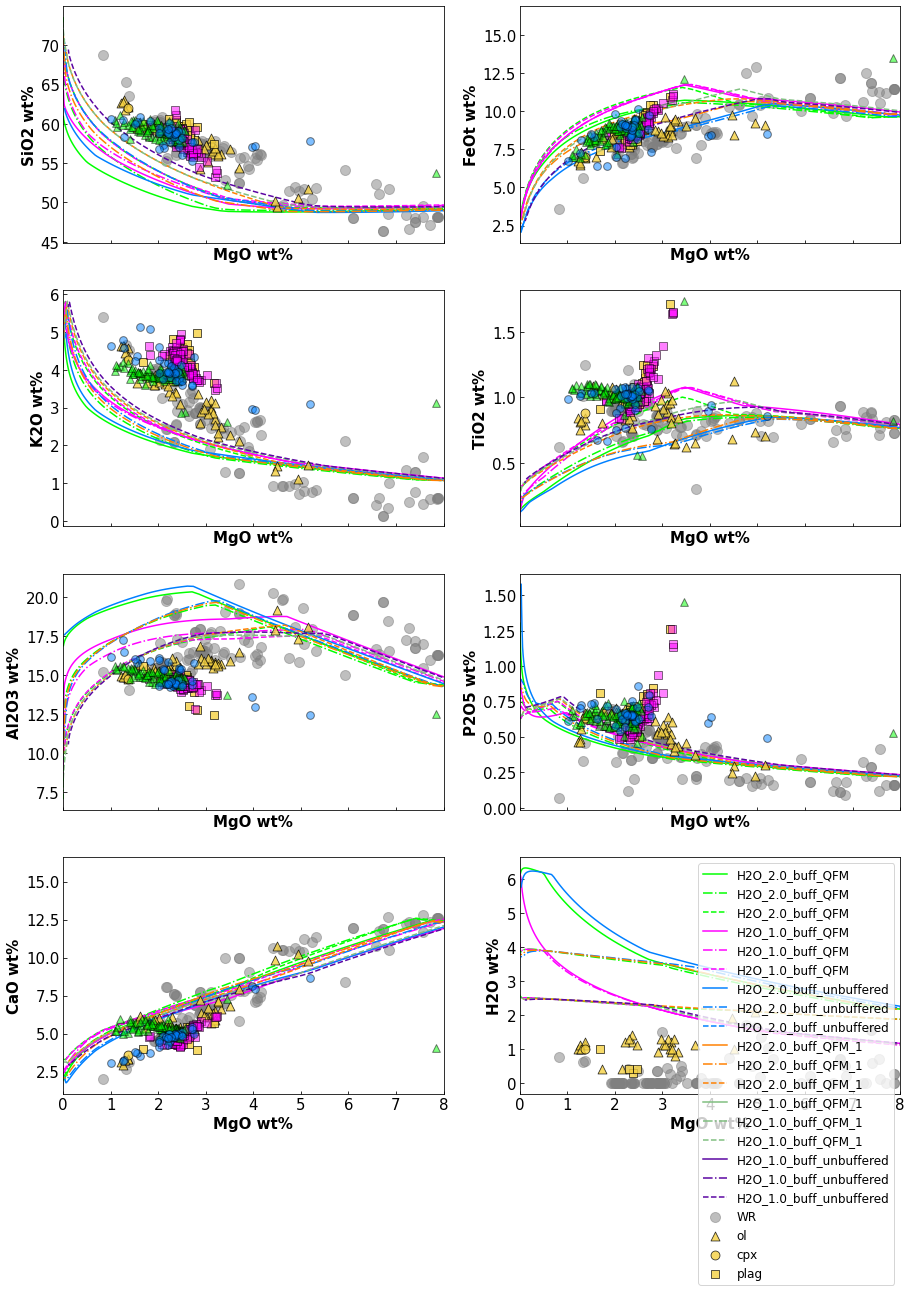

In [91]:
fig, ax = plt.subplots(4,2, sharex = True)
fig.set_figheight(20)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12



for v in volbudg:
    df_v = play[play.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['H2O_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        #plt.legend()
        
# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['^', 'o', 's']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         
ax[3,0].scatter(x, df_wr['CaO'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[3,1].scatter(x, df_wr['H2O+'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,0].scatter(x, dfhost['CaO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,1].scatter(x, dfhost['H2O+'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,1].legend()
# Plotting EPMA Data
for b in yas_mi['Min_Host'].unique():
    our_data = yas_mi[yas_mi.Min_Host == b]
        
    x = our_data['MgO']
    
    ax[0,0].scatter(x, our_data['SiO2'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[0,1].scatter(x, our_data['FeO'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[1,0].scatter(x, our_data['K2O'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[1,1].scatter(x, our_data['TiO2'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[2,0].scatter(x, our_data['Al2O3'],color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[2,1].scatter(x, our_data['P2O5'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[3,0].scatter(x, our_data['CaO'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[3,1].legend()
        
ax = ax.flatten()
for i in range(8):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,8)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')
    if i == 6:
        ax[i].set_ylabel('CaO wt%', fontsize=15, weight='bold')
    if i == 7:
        ax[i].set_ylabel('H2O wt%', fontsize=15, weight='bold')

In [92]:
play2 = mast_df.copy()#[mast_df.unique.isin(['P_1000.0_H2O_2.0_buff_QFM', 'P_1000.0_H2O_1.0_buff_QFM', 'P_1000.0_H2O_1.0_buff_unbuffered','P_1000.0_H2O_1.5_buff_unbuffered', 'P_1000.0_H2O_1.0_buff_NNO',
      # 'P_1000.0_H2O_2.0_buff_NNO', 'P_1000.0_H2O_1.5_buff_QFM_1','P_1000.0_H2O_2.0_buff_QFM_1'])] 

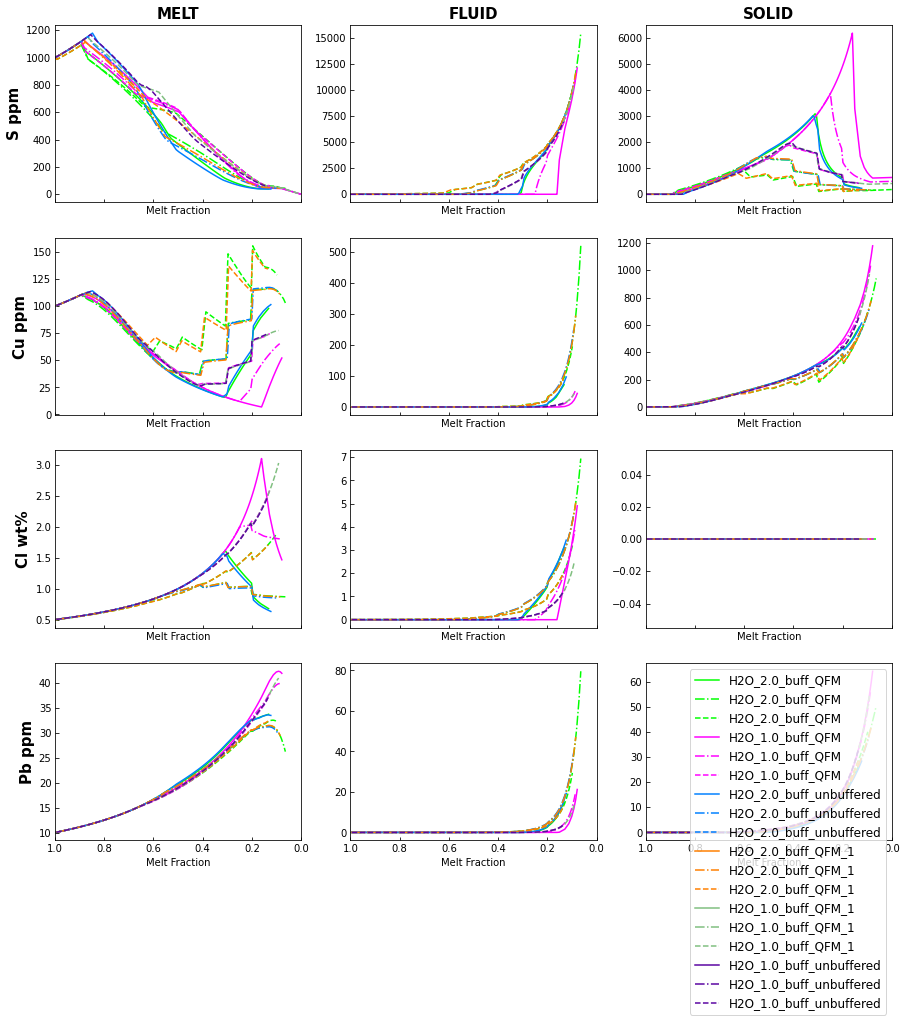

In [93]:
# Metal concentration plots
fig, ax = plt.subplots(4,3, sharex = True)
ax[0,0].invert_xaxis()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in volbudg:
    df_v = play2[play2.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['melt_f']
        ax[0,0].plot(x, df_vp['melt_S_sulf'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['fluid_S'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[0,2].plot(x, df_vp['solid_S'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['melt_Cu'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['fluid_Cu'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,2].plot(x, df_vp['solid_Cu'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['melt_Cl'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['fluid_Cl'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,2].plot(x, df_vp['solid_Cl'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['melt_Pb'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['fluid_Pb'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,2].plot(x, df_vp['solid_Pb'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,2].legend()


    
        
ax = ax.flatten()
for i in range(12):
    ax[i].tick_params(axis='both', which='both', labelsize=10, direction='in')
    ax[i].set_xlim(1,0)
    ax[i].set_xlabel('Melt Fraction', fontsize=10,weight='normal')
    if i == 0:
        ax[i].set_ylabel('S ppm', fontsize=15, weight='bold')
        ax[i].set_title('MELT', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('Cu ppm', fontsize=15, weight='bold')
    if i == 6:
        ax[i].set_ylabel('Cl wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_title('FLUID', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_title('SOLID', fontsize=15, weight='bold')
    if i == 9:
        ax[i].set_ylabel('Pb ppm', fontsize=15, weight='bold')

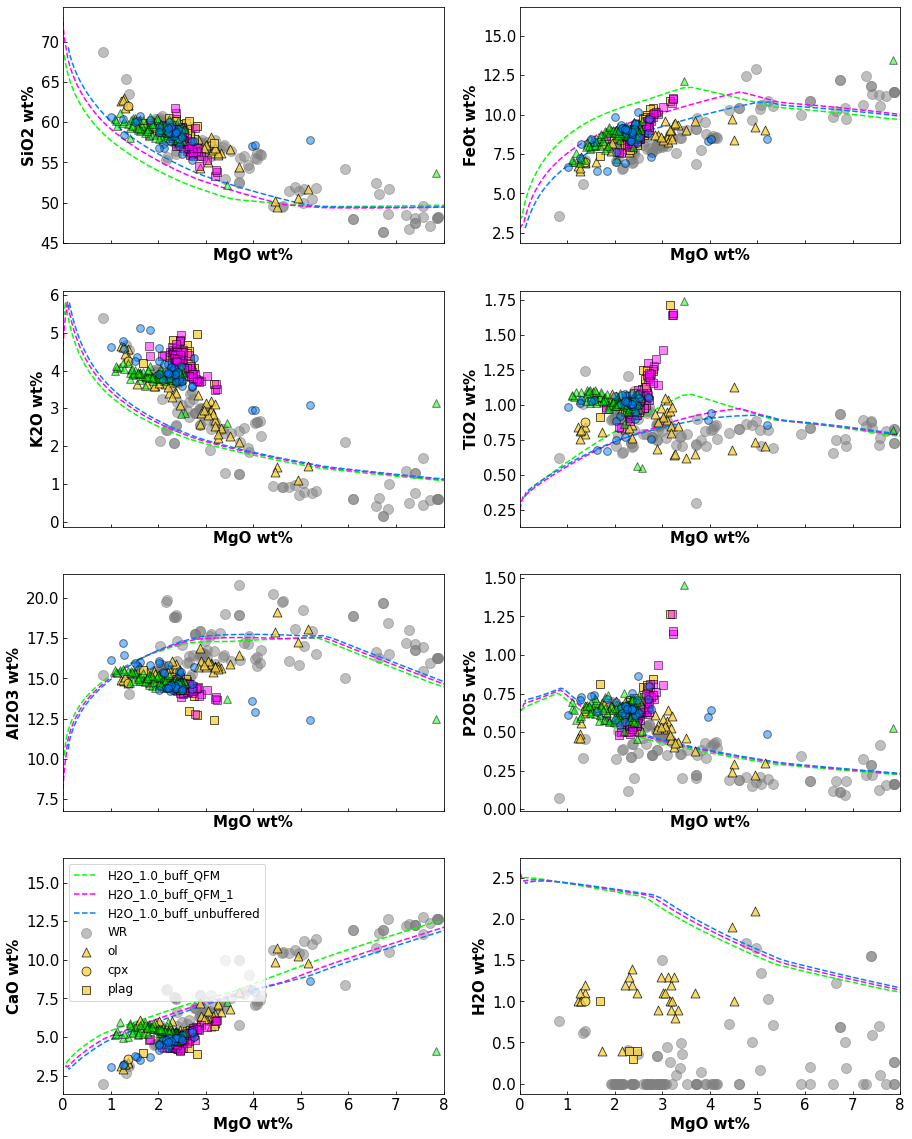

In [97]:
water_2 = play[play.unique.str.contains('H2O_1.0_')]

#example = distinctipy.get_colors(32)
#colors = example
volbudg = water_2['newcolumn'].unique()
scalarMap3 = dict(zip(volbudg, colors))

pressure = [500]

fig, ax = plt.subplots(4,2, sharex = True)
fig.set_figheight(20)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in water_2['newcolumn'].unique():
    df_v = water_2[water_2.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap3[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap3[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap3[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap3[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap3[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap3[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=scalarMap3[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['H2O_Liq'], color=scalarMap3[v], label=v, linestyle=pdict[p])

        
# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['^', 'o', 's']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         
ax[3,0].scatter(x, df_wr['CaO'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[3,1].scatter(x, df_wr['H2O+'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')   
ax[3,0].legend()


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,0].scatter(x, dfhost['CaO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,1].scatter(x, dfhost['H2O+'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,0].legend()
# Plotting EPMA Data
for b in yas_mi['Min_Host'].unique():
    our_data = yas_mi[yas_mi.Min_Host == b]
        
    x = our_data['MgO']
    
    ax[0,0].scatter(x, our_data['SiO2'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[0,1].scatter(x, our_data['FeO'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[1,0].scatter(x, our_data['K2O'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[1,1].scatter(x, our_data['TiO2'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[2,0].scatter(x, our_data['Al2O3'],color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[2,1].scatter(x, our_data['P2O5'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[3,0].scatter(x, our_data['CaO'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    #ax[3,0].legend()  
        
ax = ax.flatten()
for i in range(8):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,8)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')
    if i == 6:
        ax[i].set_ylabel('CaO wt%', fontsize=15, weight='bold')
    if i == 7:
        ax[i].set_ylabel('H2O wt%', fontsize=15, weight='bold')

In [104]:
mast_df.unique.unique()

array(['P_2000.0_H2O_1.0_buff_QFM', 'P_2000.0_H2O_1.5_buff_unbuffered',
       'P_1000.0_H2O_2.0_buff_QFM', 'P_1000.0_H2O_1.0_buff_QFM',
       'P_1000.0_H2O_1.0_buff_unbuffered',
       'P_1000.0_H2O_1.5_buff_unbuffered', 'P_1000.0_H2O_1.0_buff_NNO',
       'P_1000.0_H2O_2.0_buff_NNO', 'P_1000.0_H2O_1.5_buff_QFM_1',
       'P_1000.0_H2O_2.0_buff_QFM_1', 'P_500.0_H2O_1.0_buff_QFM',
       'P_500.0_H2O_2.0_buff_QFM', 'P_500.0_H2O_1.0_buff_NNO',
       'P_500.0_H2O_1.5_buff_QFM_1', 'P_500.0_H2O_2.0_buff_NNO',
       'P_500.0_H2O_1.0_buff_QFM_1'], dtype=object)

{'P_500.0_H2O_1.0_buff_QFM': (0.0, 1.0, 0.0), 'P_500.0_H2O_2.0_buff_QFM': (1.0, 0.0, 1.0), 'P_500.0_H2O_1.0_buff_NNO': (0.0, 0.5, 1.0), 'P_500.0_H2O_1.5_buff_QFM_1': (1.0, 0.5, 0.0), 'P_500.0_H2O_2.0_buff_NNO': (0.5, 0.75, 0.5), 'P_500.0_H2O_1.0_buff_QFM_1': (0.3026083594116735, 0.00456832734189716, 0.7045637796986179)}


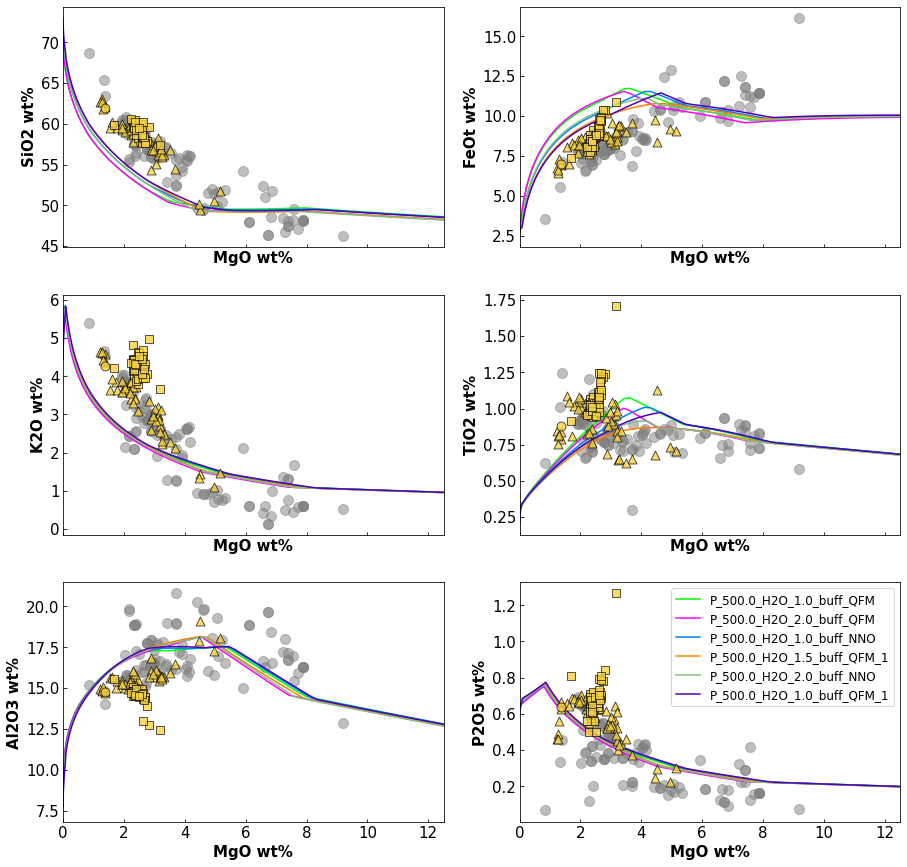

In [311]:
search_df = mast_df[mast_df.pressure_bar.isin([500])]

example = distinctipy.get_colors(10)
colors = example
volbudg = search_df['unique'].unique()
scalarMap2 = dict(zip(volbudg, colors))
print(scalarMap2)

# Major element plots
fig, ax = plt.subplots(3,2, sharex = True)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

# dict for linestyle
pressure = search_df['pressure_bar'].unique()
lines = ['solid', 'dashed', 'dashdot','dashed']
pdict = dict(zip(pressure, lines))

for v in volbudg:
    df_v = search_df[search_df.unique == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        plt.legend()
        
# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['^', 'o', 's']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    
        
ax = ax.flatten()
for i in range(6):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')

In [199]:
hamexp = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/FC_experiments.xlsx', sheet_name='Hamada_Exp')
nanexp = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/FC_experiments.xlsx', sheet_name='Nandedkar_exp')
marxexp = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/FC_experiments.xlsx', sheet_name='Marxer_exp')
wagexp = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/FC_experiments.xlsx', sheet_name='Wagner95_exp')
gaetexp = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/FC_experiments.xlsx', sheet_name='Gaetani_exp')
bakexp = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/FC_experiments.xlsx', sheet_name='BakerEgg87_exp')


In [114]:
ham_liq = hamexp[hamexp.Phases.isin(['liq'])]
ham_liq['MgO_Liq']

1      8.38
2      8.41
4      8.61
7      6.03
10     8.42
       ... 
217    6.45
221    4.95
225    6.90
227    6.17
231    4.69
Name: MgO_Liq, Length: 79, dtype: float64

In [115]:
ham_liq = hamexp[hamexp.Phases.isin(['liq'])]
ham_liq.Fo2.unique()

array(['NNO+1', 'NNO-1'], dtype=object)

{'Hamada_1': (0.0, 1.0, 0.0), 'Hamada_2': (1.0, 0.0, 1.0), 'Hamada_4': (0.0, 0.5, 1.0), 'Hamada_7': (1.0, 0.5, 0.0), 'Hamada_3': (0.5, 0.75, 0.5), 'Hamada_5': (0.4598447372769864, 0.14517265570846782, 0.5429411460934099), 'Hamada_6': (0.9969926545729841, 0.00040017640218559247, 0.13955466147677575), 'Hamada_8': (0.9912646929461574, 0.5120833785851068, 0.7898707424565661), 'Hamada_9': (0.1920626840086902, 0.4877719637691941, 0.05807189060122775), 'Hamada_10': (0.9922718017266501, 0.9798706569474063, 0.2533091449713205), 'Hamada_11': (0.0, 0.0, 1.0), 'Hamada_12': (0.0, 1.0, 1.0), 'Hamada_13': (0.0, 1.0, 0.5), 'Hamada_14': (0.5702173113764707, 0.8606774709836831, 0.004457602183595921), 'Hamada_15': (0.0, 0.5, 0.5), 'Hamada_16': (0.5285360580967474, 0.4020079086287821, 0.9533910072035777)}


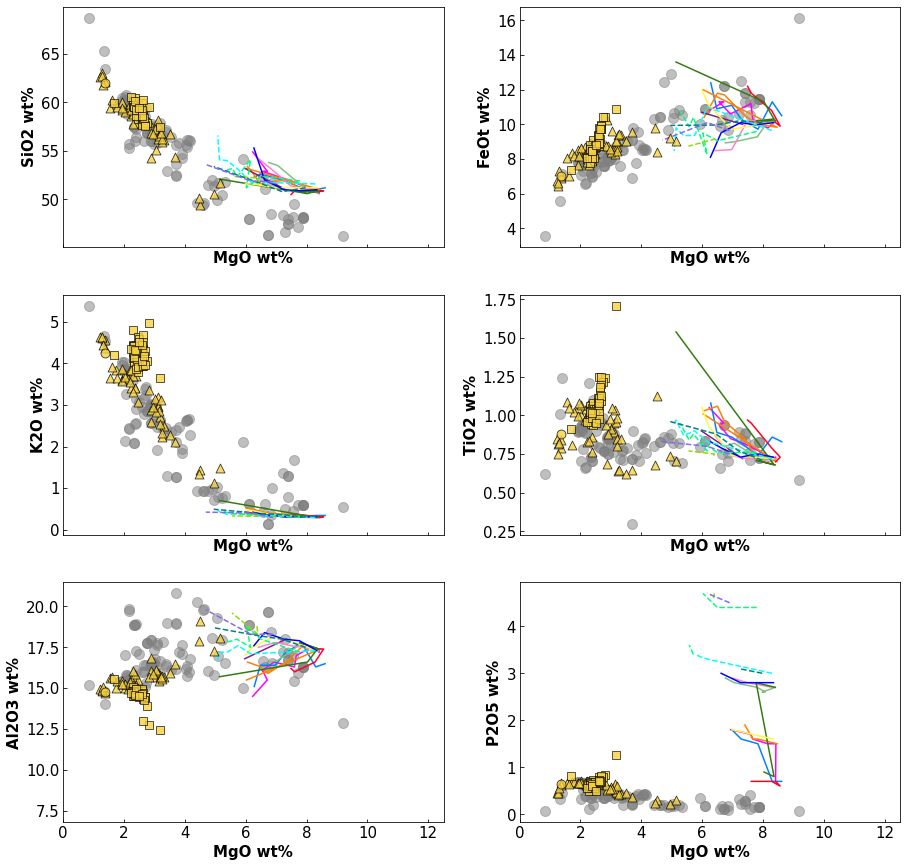

In [116]:
###### 
example = distinctipy.get_colors(16)
colors = example
volbudg = ham_liq['LLD_number'].unique()
scalarMap2 = dict(zip(volbudg, colors))
print(scalarMap2)

# Major element plots
fig, ax = plt.subplots(3,2, sharex = True)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

# dict for linestyle
pressure = ham_liq['Fo2'].unique()
lines = ['solid', 'dashed', 'dashdot','dashed']
pdict = dict(zip(pressure, lines))

for v in volbudg:
    df_v = ham_liq[ham_liq.LLD_number == v]
    for p in pressure:
        df_vp = df_v[df_v.Fo2 == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['H2O_melt_wt%'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        #plt.legend()
        
# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['^', 'o', 's']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    
        
ax = ax.flatten()
for i in range(6):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')

In [117]:
nan_liq = nanexp[nanexp.Phases.isin(['liq'])]

{'Nandedkar_1': (0.0, 1.0, 0.0)}


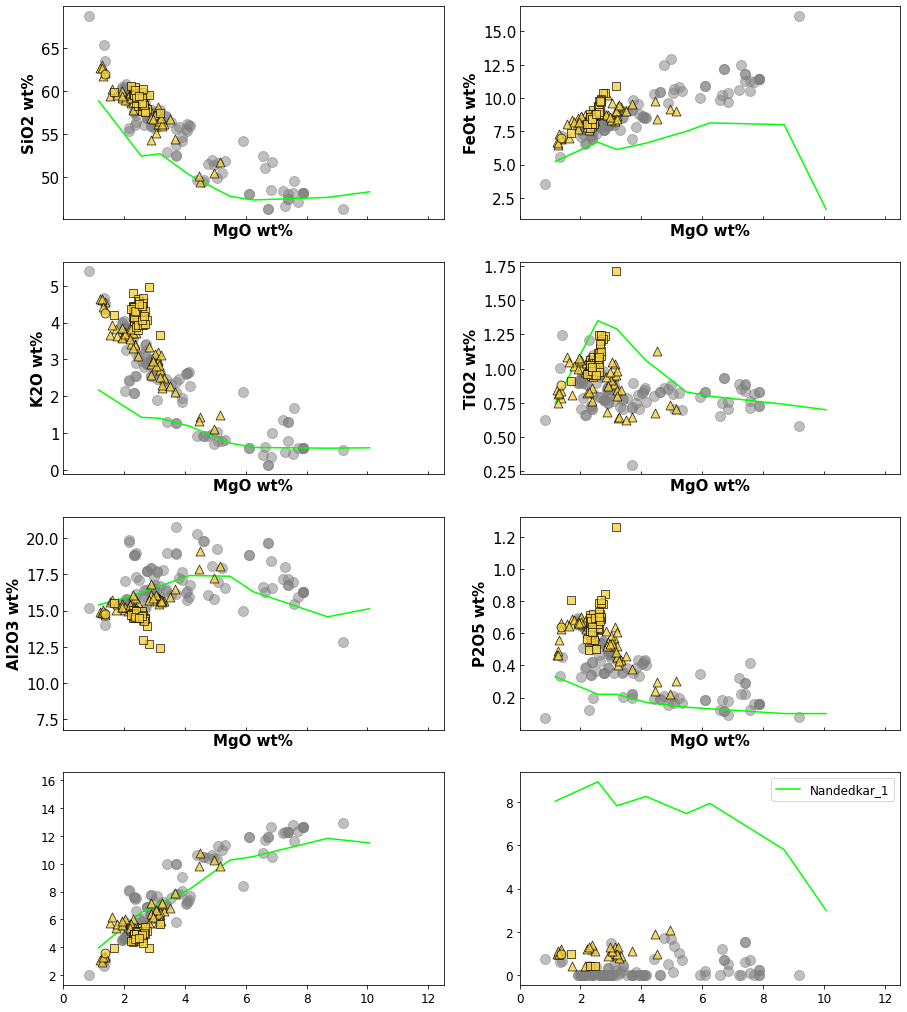

In [118]:
example = distinctipy.get_colors(2)
colors = example
volbudg = nan_liq['LLD_number'].unique()
scalarMap2 = dict(zip(volbudg, colors))
print(scalarMap2)

# Major element plots
fig, ax = plt.subplots(4,2, sharex = True)
fig.set_figheight(18)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

# dict for linestyle
pressure = nan_liq['Fo2'].unique()
lines = ['solid', 'dashed', 'dashdot','dashed']
pdict = dict(zip(pressure, lines))

for v in volbudg:
    df_v = nan_liq[nan_liq.LLD_number == v]
    for p in pressure:
        df_vp = df_v[df_v.Fo2 == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['H2O_melt_wt%'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        plt.legend()
        
# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['^', 'o', 's']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         
ax[3,0].scatter(x, df_wr['CaO'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[3,1].scatter(x, df_wr['H2O+'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,0].scatter(x, dfhost['CaO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,1].scatter(x, dfhost['H2O+'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)

        
ax = ax.flatten()
for i in range(6):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')

In [110]:
marx_liq = marxexp[marxexp.Phases.isin(['liq'])]

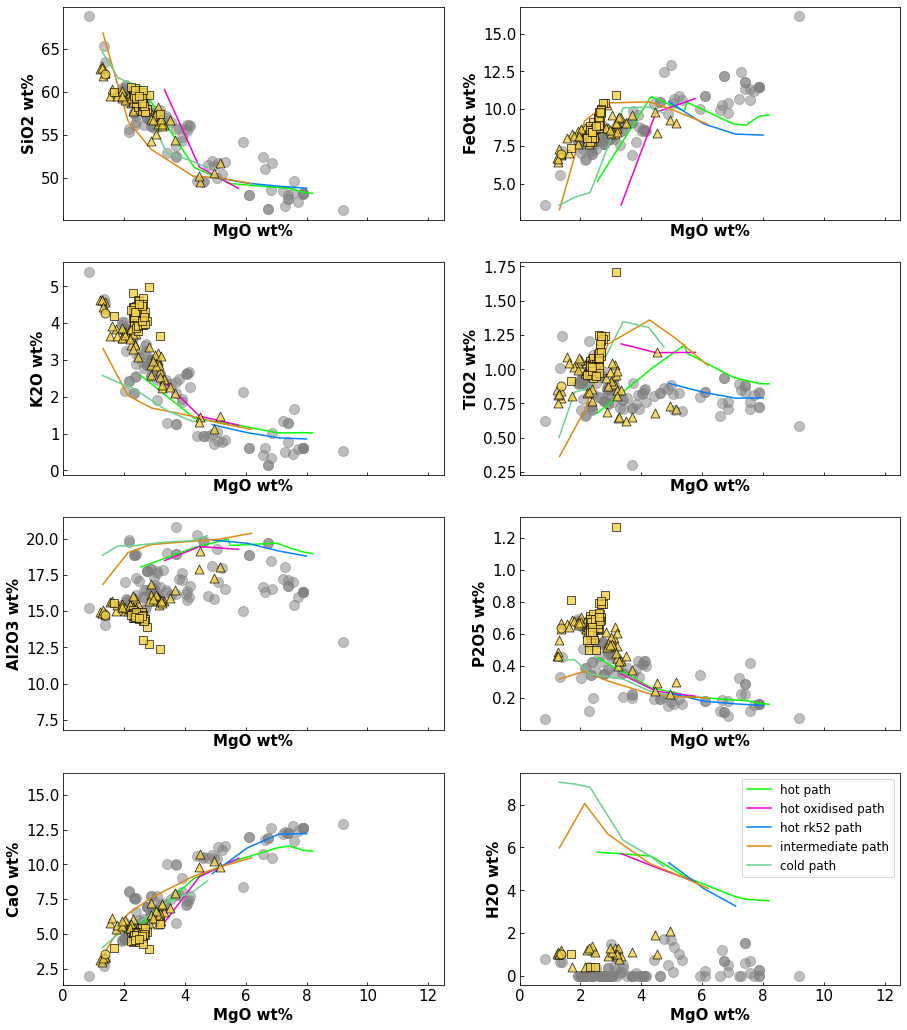

In [119]:
example = distinctipy.get_colors(6)
colors = example
volbudg = marx_liq['LLD_number'].unique()
scalarMap2 = dict(zip(volbudg, colors))

# Major element plots
fig, ax = plt.subplots(4,2, sharex = True)
fig.set_figheight(18)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

# dict for linestyle
pressure = marx_liq['Phases'].unique()
lines = ['solid', 'dashed', 'dashdot','dashed']
pdict = dict(zip(pressure, lines))

for v in volbudg:
    df_v = marx_liq[marx_liq.LLD_number == v]
    for p in pressure:
        df_vp = df_v[df_v.Phases == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['H2O_melt_wt%'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        plt.legend()
        
# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['^', 'o', 's']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         
ax[3,0].scatter(x, df_wr['CaO'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[3,1].scatter(x, df_wr['H2O+'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,0].scatter(x, dfhost['CaO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,1].scatter(x, dfhost['H2O+'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    
        
ax = ax.flatten()
for i in range(8):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')
    if i == 6:
        ax[i].set_ylabel('CaO wt%', fontsize=15, weight='bold')
    if i == 7:
        ax[i].set_ylabel('H2O wt%', fontsize=15, weight='bold')

In [214]:
exp_master = pd.concat([marxexp, nanexp, wagexp], axis=0) # ,bakexp, wagexp, hamexp,nanexp,marxexp

In [216]:
exp_liq = exp_master[exp_master.Phases.isin(['liq','Melt']) & exp_master['P (kbar)'].isin([0,1,2,4])]

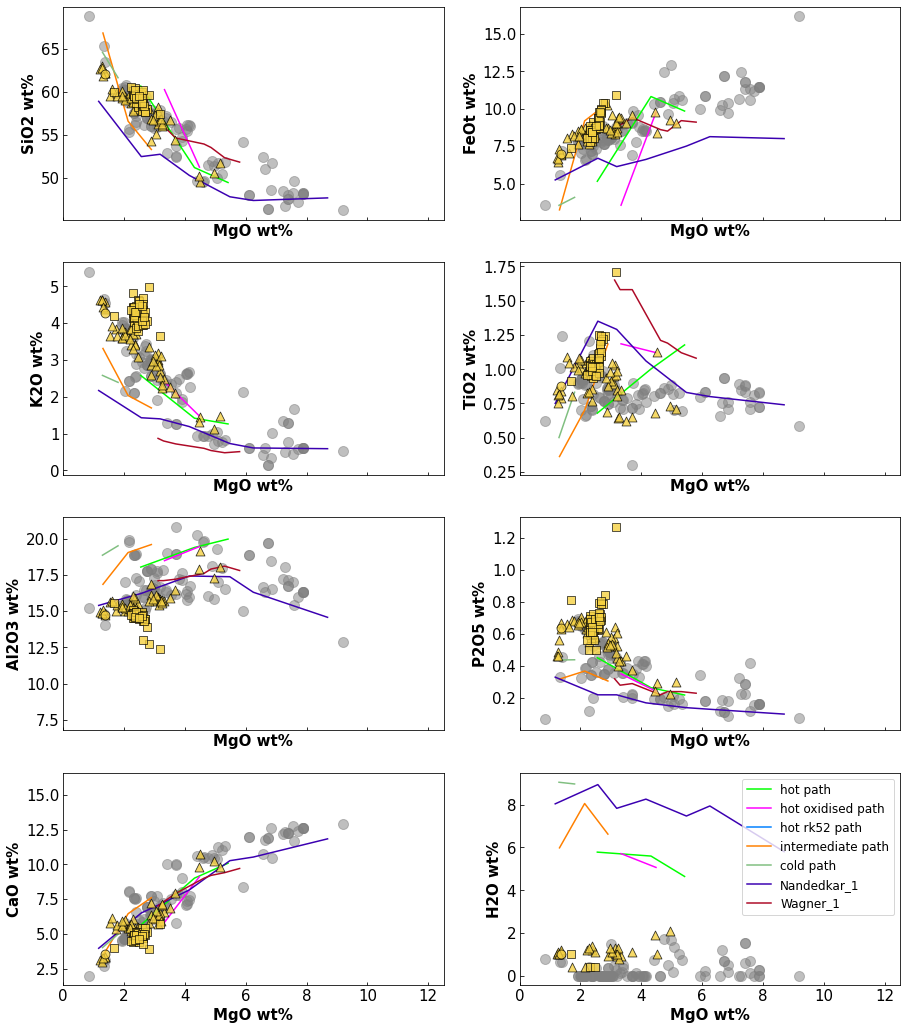

In [218]:
example = distinctipy.get_colors(30)
colors = example
volbudg = exp_liq['LLD_number'].unique()
scalarMap2 = dict(zip(volbudg, colors))

# Major element plots
fig, ax = plt.subplots(4,2, sharex = True)
fig.set_figheight(18)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

# dict for linestyle
pressure = exp_liq['Phases'].unique()
lines = ['solid', 'dashed', 'dashdot','dashed']
pdict = dict(zip(pressure, lines))

for v in volbudg:
    df_v = exp_liq[exp_liq.LLD_number == v]
    for p in pressure:
        df_vp = df_v[df_v['Phases'] == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        ax[3,1].plot(x, df_vp['H2O_melt_wt%'], color=scalarMap2[v], label=v, linestyle=pdict[p])
        plt.legend()
        
# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['^', 'o', 's']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         
ax[3,0].scatter(x, df_wr['CaO'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[3,1].scatter(x, df_wr['H2O+'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,0].scatter(x, dfhost['CaO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,1].scatter(x, dfhost['H2O+'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    
        
ax = ax.flatten()
for i in range(8):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,12.5)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')
    if i == 6:
        ax[i].set_ylabel('CaO wt%', fontsize=15, weight='bold')
    if i == 7:
        ax[i].set_ylabel('H2O wt%', fontsize=15, weight='bold')

### Sensitivity Analysis - 1.2.0 versus 1.0.2

In [161]:
mixed_vol = pd.read_excel('Paper2Model_complete_1.2_Jan_with_CO2.xlsx')
h2o_120 =  pd.read_excel('Paper2Model_complete_1.2_Jan_.xlsx')#, sheet_name='')


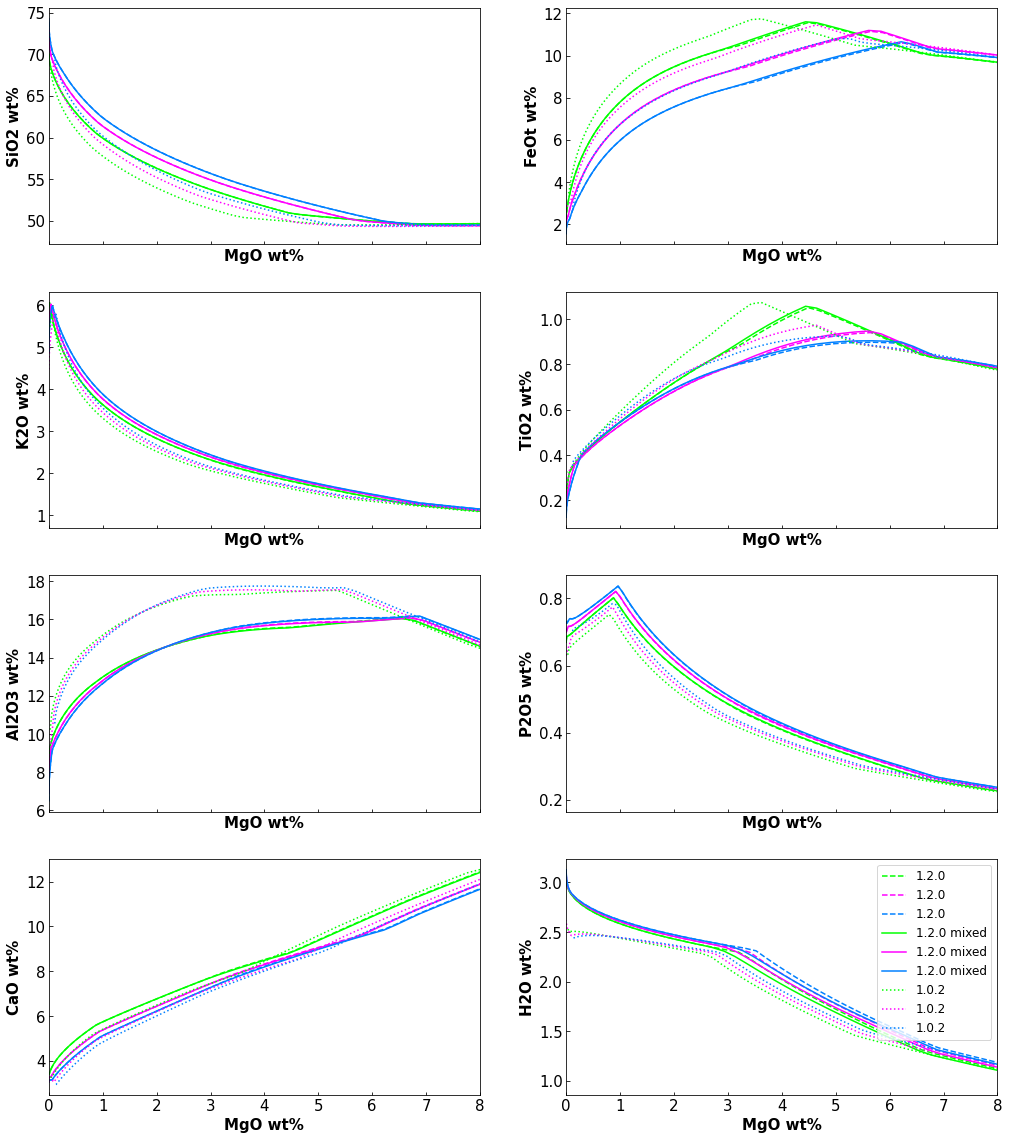

In [199]:
water_2 = h2o_120[h2o_120.unique.str.contains('H2O_1.0')]
mixedvol_2 = mixed_vol[mixed_vol.unique.str.contains('H2O_1.0')]
water_1 = play[play.unique.str.contains('H2O_1.0')]

#example = distinctipy.get_colors(32)
#colors = example
volbudg = water_2['newcolumn'].unique()
scalarMap3 = dict(zip(volbudg, colors))

pressure = [500]

fig, ax = plt.subplots(4,2, sharex = True)
fig.set_figheight(20)
fig.set_figwidth(17)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12


for v in water_2['newcolumn'].unique():
    df_v = water_2[water_2.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[3,1].plot(x, df_vp['H2O_Liq'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        

for v in mixedvol_2['newcolumn'].unique():
    df_v = mixedvol_2[mixedvol_2.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap3[v], label='1.2.0', linestyle='-')
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap3[v], label=v, linestyle='-')
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap3[v], label=v, linestyle='-')
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap3[v], label=v, linestyle='-')
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap3[v], label=v, linestyle='-')
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap3[v], label=v, linestyle='-')
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=scalarMap3[v], label=v, linestyle='-')
        ax[3,1].plot(x, df_vp['H2O_Liq'], color=scalarMap3[v], label='1.2.0 mixed', linestyle='-')


for v in water_1['newcolumn'].unique():
    df_v = water_1[water_1.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['MgO_Liq']
        ax[0,0].plot(x, df_vp['SiO2_Liq'], color=scalarMap3[v], label=v, linestyle=':')
        ax[0,1].plot(x, df_vp['FeOt_Liq'], color=scalarMap3[v], label=v, linestyle=':')
        ax[1,0].plot(x, df_vp['K2O_Liq'], color=scalarMap3[v], label=v, linestyle=':')
        ax[1,1].plot(x, df_vp['TiO2_Liq'], color=scalarMap3[v], label=v, linestyle=':')
        ax[2,0].plot(x, df_vp['Al2O3_Liq'], color=scalarMap3[v], label=v, linestyle=':')
        ax[2,1].plot(x, df_vp['P2O5_Liq'], color=scalarMap3[v], label=v, linestyle=':')
        ax[3,0].plot(x, df_vp['CaO_Liq'], color=scalarMap3[v], label=v, linestyle=':')
        ax[3,1].plot(x, df_vp['H2O_Liq'], color=scalarMap3[v], label='1.0.2', linestyle=':')
        ax[3,1].legend()

        
        #### natural data input #####        
# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['^', 'o', 's']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         
ax[3,0].scatter(x, df_wr['CaO'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
ax[3,1].scatter(x, df_wr['H2O+'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')   
ax[3,0].legend()


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,0].scatter(x, dfhost['CaO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,1].scatter(x, dfhost['H2O+'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    
# Plotting EPMA Data
for b in yas_mi['Min_Host'].unique():
    our_data = yas_mi[yas_mi.Min_Host == b]
        
    x = our_data['MgO']
    
    ax[0,0].scatter(x, our_data['SiO2'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[0,1].scatter(x, our_data['FeO'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[1,0].scatter(x, our_data['K2O'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[1,1].scatter(x, our_data['TiO2'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[2,0].scatter(x, our_data['Al2O3'],color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[2,1].scatter(x, our_data['P2O5'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    ax[3,0].scatter(x, our_data['CaO'], color=probe_cdict[b], marker=probe_symdict[b],alpha=0.5, edgecolor='k',s=60, label=x, zorder=3)
    
ax = ax.flatten()
for i in range(8):
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction='in')
    ax[i].set_xlim(0,8)
    ax[i].set_xlabel('MgO wt%', fontsize=15,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeOt wt%', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=15, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=15, weight='bold')
    if i == 6:
        ax[i].set_ylabel('CaO wt%', fontsize=15, weight='bold')
    if i == 7:
        ax[i].set_ylabel('H2O wt%', fontsize=15, weight='bold')

{'H2O_1.0_buff_QFM': (0.0, 1.0, 0.0), 'H2O_1.0_buff_QFM_1': (1.0, 0.0, 1.0), 'H2O_1.0_buff_unbuffered': (0.0, 0.5, 1.0)}
{2000: 'solid', 1000: 'dashdot', 500: 'dashed'}


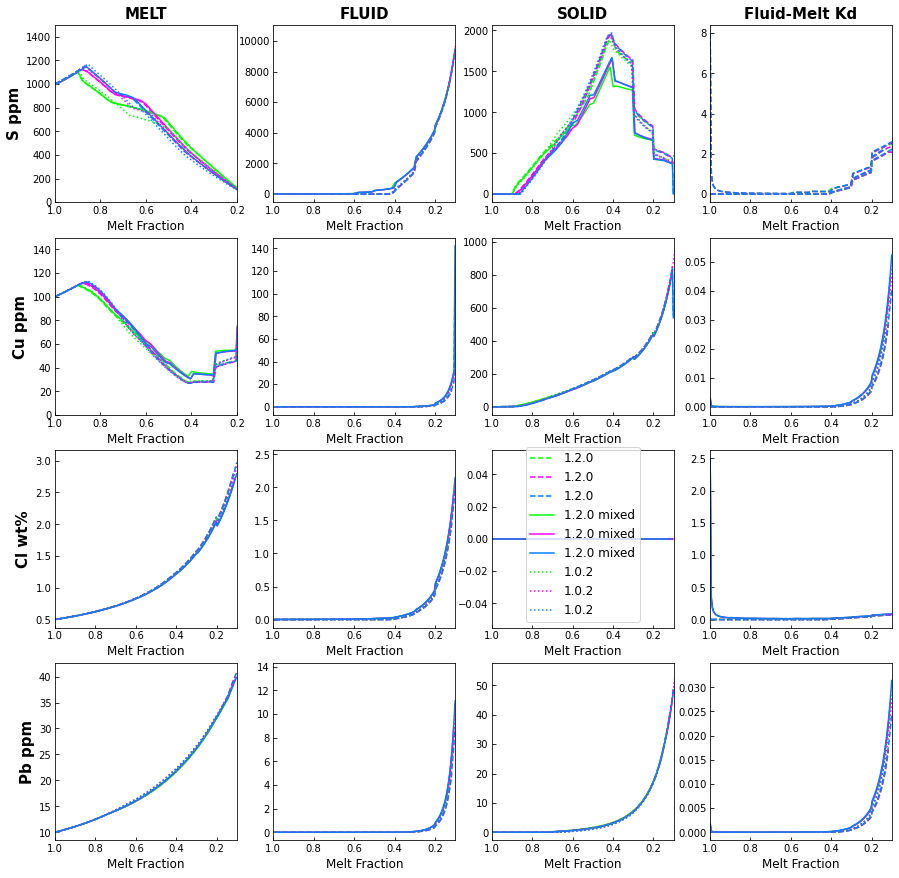

In [197]:
water_2 = h2o_120[h2o_120.unique.str.contains('H2O_1.0')]
mixedvol_2 = mixed_vol[mixed_vol.unique.str.contains('H2O_1.0')]
water_1 = play[play.unique.str.contains('H2O_1.0')]

fig, ax = plt.subplots(4,4, sharex = False)
ax[0,0].invert_xaxis()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

volbudg = water_2['newcolumn'].unique()
scalarMap3 = dict(zip(volbudg, colors))
pressure = [500]
print(scalarMap3)
print(pdict)

for v in volbudg:
    df_v = water_2[water_2.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['melt_f']
        ax[0,0].plot(x, df_vp['melt_S_sulf'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[0,1].plot(x, df_vp['fluid_S'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[0,2].plot(x, df_vp['solid_S'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[1,0].plot(x, df_vp['melt_Cu'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[1,1].plot(x, df_vp['fluid_Cu'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[1,2].plot(x, df_vp['solid_Cu'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[2,0].plot(x, df_vp['melt_Cl'], color=scalarMap3[v], label=v, linestyle='dashed')
        ax[2,1].plot(x, df_vp['fluid_Cl'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        ax[2,2].plot(x, df_vp['solid_Cl'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        ax[3,0].plot(x, df_vp['melt_Pb'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        ax[3,1].plot(x, df_vp['fluid_Pb'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        ax[3,2].plot(x, df_vp['solid_Pb'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        ax[2,2].legend()
        #Fluid-Melt Partitioning behaviour
        ax[0,3].plot(x, df_vp['bulk_DS'], color=scalarMap3[v], label='DS', linestyle='dashed')
        ax[2,3].plot(x, df_vp['bulk_DCl'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        ax[1,3].plot(x, df_vp['bulk_DCu_fm'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        ax[3,3].plot(x, df_vp['bulk_DPb_fm'], color=scalarMap3[v], label='1.2.0', linestyle='dashed')
        
for v in volbudg:
    df_v = mixedvol_2[mixedvol_2.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['melt_f']
        ax[0,0].plot(x, df_vp['melt_S_sulf'], color=scalarMap3[v], label=v, linestyle='-')
        ax[0,1].plot(x, df_vp['fluid_S'], color=scalarMap3[v], label=v, linestyle='-')
        ax[0,2].plot(x, df_vp['solid_S'], color=scalarMap3[v], label=v, linestyle='-')
        ax[1,0].plot(x, df_vp['melt_Cu'], color=scalarMap3[v], label=v, linestyle='-')
        ax[1,1].plot(x, df_vp['fluid_Cu'], color=scalarMap3[v], label=v, linestyle='-')
        ax[1,2].plot(x, df_vp['solid_Cu'], color=scalarMap3[v], label=v, linestyle='-')
        ax[2,0].plot(x, df_vp['melt_Cl'], color=scalarMap3[v], label=v, linestyle='-')
        ax[2,1].plot(x, df_vp['fluid_Cl'], color=scalarMap3[v], label=v, linestyle='-')
        ax[2,2].plot(x, df_vp['solid_Cl'], color=scalarMap3[v], label='1.2.0 mixed', linestyle='-')
        ax[3,0].plot(x, df_vp['melt_Pb'], color=scalarMap3[v], label='1.2.0 mixed', linestyle='-')
        ax[3,1].plot(x, df_vp['fluid_Pb'], color=scalarMap3[v], label='1.2.0 mixed', linestyle='-')
        ax[3,2].plot(x, df_vp['solid_Pb'], color=scalarMap3[v], label='1.2.0 mixed', linestyle='-')
        ax[2,2].legend()
        #Fluid-Melt Partitioning behaviour
        ax[0,3].plot(x, df_vp['bulk_DS'], color=scalarMap3[v], label='DS', linestyle=pdict[p])
        ax[2,3].plot(x, df_vp['bulk_DCl'], color=scalarMap3[v], label='1.2.0 mixed', linestyle='-')
        ax[1,3].plot(x, df_vp['bulk_DCu_fm'], color=scalarMap3[v],label='1.2.0 mixed', linestyle='-')
        ax[3,3].plot(x, df_vp['bulk_DPb_fm'], color=scalarMap3[v],label='1.2.0 mixed', linestyle='-')

for v in volbudg:
    df_v = water_1[water_1.newcolumn == v]
    for p in pressure:
        df_vp = df_v[df_v.pressure_bar == p]
        
        x = df_vp['melt_f']
        ax[0,0].plot(x, df_vp['melt_S_sulf'], color=scalarMap3[v], label=v, linestyle=':')
        ax[0,1].plot(x, df_vp['fluid_S'], color=scalarMap3[v], label=v, linestyle=':')
        ax[0,2].plot(x, df_vp['solid_S'], color=scalarMap3[v], label=v, linestyle=':')
        ax[1,0].plot(x, df_vp['melt_Cu'], color=scalarMap3[v], label=v, linestyle=':')
        ax[1,1].plot(x, df_vp['fluid_Cu'], color=scalarMap3[v], label=v, linestyle=':')
        ax[1,2].plot(x, df_vp['solid_Cu'], color=scalarMap3[v], label=v, linestyle=':')
        ax[2,0].plot(x, df_vp['melt_Cl'], color=scalarMap3[v], label=v, linestyle=':')
        ax[2,1].plot(x, df_vp['fluid_Cl'], color=scalarMap3[v], label=v, linestyle=':')
        ax[2,2].plot(x, df_vp['solid_Cl'], color=scalarMap3[v], label='1.0.2', linestyle=':')
        ax[3,0].plot(x, df_vp['melt_Pb'], color=scalarMap3[v], label='1.0.2', linestyle=':')
        ax[3,1].plot(x, df_vp['fluid_Pb'], color=scalarMap3[v], label='1.0.2', linestyle=':')
        ax[3,2].plot(x, df_vp['solid_Pb'], color=scalarMap3[v], label='1.0.2', linestyle=':')
        ax[2,2].legend()
        #Fluid-Melt Partitioning behaviour
        ax[0,3].plot(x, df_vp['bulk_DS'], color=scalarMap3[v], label='DS', linestyle=pdict[p])
        ax[2,3].plot(x, df_vp['bulk_DCl'], color=scalarMap3[v], label='1.0.2', linestyle=':')
        ax[1,3].plot(x, df_vp['bulk_DCu_fm'], color=scalarMap3[v], label='1.0.2', linestyle=':')
        ax[3,3].plot(x, df_vp['bulk_DPb_fm'], color=scalarMap3[v], label='1.0.2', linestyle=':')

        
ax = ax.flatten()
for i in range(16):
    ax[i].tick_params(axis='both', which='both', labelsize=10, direction='in')
    ax[i].set_xlim(1,0.1)
    ax[i].set_xlabel('Melt Fraction', fontsize=12,weight='normal')
    if i == 0:
        ax[i].set_ylabel('S ppm', fontsize=15, weight='bold')
        ax[i].set_xlim(1, 0.2)
        ax[i].set_ylim(0,1500)
        ax[i].set_title('MELT', fontsize=15, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Cu ppm', fontsize=15, weight='bold')
        ax[i].set_xlim(1, 0.2)
        ax[i].set_ylim(0,150)
    if i == 8:
        ax[i].set_ylabel('Cl wt%', fontsize=15, weight='bold')
    if i == 1:
        ax[i].set_title('FLUID', fontsize=15, weight='bold')
    if i == 2:
        ax[i].set_title('SOLID', fontsize=15, weight='bold')
    if i == 3:
        ax[i].set_title('Fluid-Melt Kd', fontsize=15, weight='bold')
    if i == 12:
        ax[i].set_ylabel('Pb ppm', fontsize=15, weight='bold')